In [1]:
#Loading dataset
import pandas as pd
from luciferml.supervised.regression import Regression
from luciferml.supervised.classification import Classification
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from pickle import dump, load
import optuna
from colorama import Fore
from IPython.display import display

df = pd.read_excel('QAQ.xlsx')
df.to_csv('Wastewater treatment plant.csv', index=False)



``multivariate`` option is an experimental feature. The interface can change in the future.


In [2]:
file1_path = "Wastewater treatment plant.csv"
file2_path = "data_features_Order.csv"


df1 = pd.read_csv(file1_path)
df2 = pd.read_csv(file2_path)
# Concatenate the DataFrames horizontally (along columns)
combination = pd.concat([df1, df2], axis=1)

# Replace 'combination.csv' with the desired name for the combined CSV file
combination.to_csv('ORDER and wwt.csv', index=False)
df = pd.read_csv('ORDER and wwt.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data_features_Order.csv'

In [3]:
df2

NameError: name 'df2' is not defined

In [3]:
new_column_name = 'Aeration tank(HRT)'
df.rename(columns={'Aeration tank': new_column_name}, inplace=True)

new_column_name = 'Plant(HRT)'
df.rename(columns={'Plant': new_column_name}, inplace=True)

new_column_name = 'Annual average temperature (oC)'
df.rename(columns={'Annual average': new_column_name}, inplace=True)

new_column_name = 'Annual mean of daily maximum temperature (oC) '
df.rename(columns={'Annual mean of daily maximum': new_column_name}, inplace=True)

new_column_name = 'Annual mean of daily minimum temperature (oC) '
df.rename(columns={'Annual mean of daily minimum': new_column_name}, inplace=True)

new_column_name = 'Sampling month average temperature (oC)'
df.rename(columns={'Sampling month average': new_column_name}, inplace=True)

new_column_name = 'Annual mean of daily minimum temperature (oC) '
df.rename(columns={'Annual mean of daily minimum': new_column_name}, inplace=True)

new_column_name = 'Annual Precipitation(mm)'
df.rename(columns={'Annual': new_column_name}, inplace=True)

new_column_name = 'Sampling month Precipitation(mm)'
df.rename(columns={'Sampling month': new_column_name}, inplace=True)

new_column_name = 'Annual Precipitation(mm)'
df.rename(columns={'Annual': new_column_name}, inplace=True)

new_column_name = 'General AS process type'
df.rename(columns={'General type ': new_column_name}, inplace=True)

new_column_name = 'Detailed AS process type'
df.rename(columns={'Detailed type': new_column_name}, inplace=True)

new_column_name = 'Percentage of Industry wastewater source'
df.rename(columns={'Percentage': new_column_name}, inplace=True)

new_column_name = 'Contained in Inf? (Industry wastewater source)'
df.rename(columns={'Contained in Inf?': new_column_name}, inplace=True)



In [4]:
missing_percentage = df.isnull().sum() / len(df) * 100
missing_percentage

Sample ID                      0.336134
WWTP ID                        0.084034
SiteID                         0.336134
Site Name                      0.336134
Sampling Date                  6.386555
                                 ...   
Calditrichales                 0.336134
Reyranellales                  0.336134
Dongiales                      0.336134
Chthonomonadales               0.336134
Candidatus Yanofskybacteria    0.336134
Length: 239, dtype: float64

In [5]:
columns_to_delete = df.columns[60:68]  # 注意 Python 中索引从 0 开始，因此第 62 列的索引是 61
df.drop(columns=columns_to_delete, inplace=True)

In [6]:
df.columns

Index(['Sample ID', 'WWTP ID', 'SiteID', 'Site Name', 'Sampling Date',
       'Latitude', 'Longitude', 'City Name', 'Country/Region', 'Continent',
       ...
       'Syntrophorhabdales', 'Bradymonadales', 'Solibacterales',
       'Methylacidiphilales', 'UASB-TL25', 'Calditrichales', 'Reyranellales',
       'Dongiales', 'Chthonomonadales', 'Candidatus Yanofskybacteria'],
      dtype='object', length=231)

In [7]:
columns_to_drop = ['Sample ID', 'WWTP ID', 'SiteID', 'Site Name', 'Sampling Date',
       'Latitude', 'Longitude', 'City Name', 'Country/Region', 'Continent',
       'Climate typea', 'Annual average temperature (oC)',
       'Annual mean of daily maximum temperature (oC) ',
       'Annual mean of daily minimum temperature (oC) ',
       'Sampling month average temperature (oC)', 'Sampling moment',
       'Annual Precipitation(mm)', 'Sampling month Precipitation(mm)',
       'GDP per capita (dollars)', 'City population', 'Year of plant build',
       'Nitrification', 'Denitrification','Aerator type', 'BOD (mg/l) inf/(1+recycle ratio)', 'BOD (mg/l) Aeration tank inf',
       'COD (mg/l) Inf/(1+recycle ratio)',
       'COD (mg/l) Aeration tank inf','F/M (kg BOD/kg MLSS-d)', 'NH4-N (mg/l) Aeration tank inf', 
        'TN (mg/l) Aeration tank inf','TP (mg/l) Aeration tank inf', 'Conductivity (μS/cm)','NH4-N (mg/l)', 'NO3-N (mg/l)', 'SVI (ml/g)'
        ]

df = df.drop(columns=columns_to_drop)

In [8]:
missing_percentage = df.isnull().sum() / len(df) * 100

In [9]:
missing_percentage

Designed capacity (m3/d)         18.319328
Actual Inf rate (m3/d)           18.487395
Volume of aeration tanks (m3)    28.571429
Plant(HRT)                       47.058824
Aeration tank(HRT)               46.722689
                                   ...    
Calditrichales                    0.336134
Reyranellales                     0.336134
Dongiales                         0.336134
Chthonomonadales                  0.336134
Candidatus Yanofskybacteria       0.336134
Length: 195, dtype: float64

In [10]:
df.columns

Index(['Designed capacity (m3/d)', 'Actual Inf rate (m3/d)',
       'Volume of aeration tanks (m3)', 'Plant(HRT)', 'Aeration tank(HRT)',
       'SRT (d)', 'General AS process type', 'Detailed AS process type',
       'BOD (mg/l) Inf', 'BOD (mg/l) Eff',
       ...
       'Syntrophorhabdales', 'Bradymonadales', 'Solibacterales',
       'Methylacidiphilales', 'UASB-TL25', 'Calditrichales', 'Reyranellales',
       'Dongiales', 'Chthonomonadales', 'Candidatus Yanofskybacteria'],
      dtype='object', length=195)

In [11]:
targets = df.columns.to_numpy()
targets = targets[0:]
print(targets)

['Designed capacity (m3/d)' 'Actual Inf rate (m3/d)'
 'Volume of aeration tanks (m3)' 'Plant(HRT)' 'Aeration tank(HRT)'
 'SRT (d)' 'General AS process type' 'Detailed AS process type'
 'BOD (mg/l) Inf' 'BOD (mg/l) Eff' 'COD (mg/l) Inf' 'COD (mg/l) Eff'
 'NH4-N (mg/l) Inf' 'NH4-N (mg/l) Eff' 'TN (mg/l) Inf' 'TN (mg/l) Eff'
 'TP (mg/l) Inf' 'TP (mg/l) Eff'
 'Contained in Inf? (Industry wastewater source)'
 'Percentage of Industry wastewater source' 'MLSS (mg/l)' 'DO (mg/l)' 'pH'
 'Mixed liquid temperature (oC)' 'Unclassified' 'Burkholderiales'
 'Chitinophagales' 'Others' 'Rickettsiales' 'Bacteroidales' 'Chlamydiales'
 'Sphingobacteriales' 'Bdellovibrionales' 'Polyangiales' 'Rhizobiales'
 'Oscillospirales' 'Anaerolineales' '0319-6G20' 'Pseudomonadales'
 'Gemmatales' 'Cytophagales' 'Babeliales' 'Pirellulales'
 'Flavobacteriales' 'SBR1031' 'Pedosphaerales' 'Xanthomonadales'
 'Phycisphaerales' 'Haliangiales' 'Saccharimonadales' 'Omnitrophales'
 'Candidatus Nomurabacteria' 'Lachnospirales' 'M

In [12]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)  # 这里的 n_neighbors 可以根据你的需求进行调整

In [13]:
columns_to_extract = [ 'Designed capacity (m3/d)', 'Actual Inf rate (m3/d)',
       'Volume of aeration tanks (m3)', 'Plant(HRT)', 'Aeration tank(HRT)',
       'SRT (d)',
       'BOD (mg/l) Inf', 'COD (mg/l) Inf', 'NH4-N (mg/l) Inf', 'TN (mg/l) Inf',
       'TP (mg/l) Inf', 'MLSS (mg/l)', 'DO (mg/l)', 'pH',
       'Mixed liquid temperature (oC)','Unclassified', 'Burkholderiales', 'Chitinophagales', 'Others', 'Rickettsiales', 'Bacteroidales', 'Chlamydiales', 'Sphingobacteriales', 'Bdellovibrionales', 'Polyangiales', 'Rhizobiales', 'Oscillospirales', 'Anaerolineales', '0319-6G20', 'Pseudomonadales', 'Gemmatales', 'Cytophagales', 'Babeliales', 'Pirellulales', 'Flavobacteriales', 'SBR1031', 'Pedosphaerales', 'Xanthomonadales', 'Phycisphaerales', 'Haliangiales', 'Saccharimonadales', 'Omnitrophales', 'Candidatus Nomurabacteria', 'Lachnospirales', 'Myxococcales', 'Woesearchaeales', 'Microtrichales', 'Christensenellales', 'Caldilineales', 'Micavibrionales', 'Peptostreptococcales-Tissierellales', 'Spirochaetales', 'Oligoflexales', 'Candidatus Magasanikbacteria', 'Chloroplast', 'Nitrospirales', 'Legionellales', 'Bacteriovoracales', 'Sphingomonadales', 'Planctomycetales', 'metagenome', 'Absconditabacteriales (SR1)', 'WCHB1-41', 'Paracaedibacterales', 'Candidatus Kaiserbacteria', 'Micrococcales', 'Verrucomicrobiales', 'Campylobacterales', 'Gammaproteobacteria Incertae Sedis', 'Opitutales', 'Solirubrobacterales', 'Rhodobacterales', 'Gemmatimonadales', 'Candidatus Moranbacteria', 'Fimbriimonadales', 'Rhodospirillales', 'Enterobacterales', 'Diplorickettsiales', 'Candidatus Woesebacteria', 'Caulobacterales', 'Candidatus Peregrinibacteria', 'mle1-27', 'RF39', 'Desulfovibrionales', 'Acetobacterales', 'Clostridiales', 'Chloroflexales', 'Erysipelotrichales', 'Methylococcales', 'Coxiellales', 'Leptospirales', 'RBG-13-54-9', 'Ardenticatenales', 'Blastocatellales', '44524', 'Vicinamibacterales', 'Competibacterales', 'Kapabacteriales', 'Isosphaerales', 'Lactobacillales', 'Chthoniobacterales', 'Ignavibacteriales', 'Gaiellales', 'Candidatus Pacebacteria', 'Veillonellales-Selenomonadales', 'Bryobacterales', 'Desulfobacterales', 'Corynebacteriales', 'Hydrogenedentiales', 'mle1-8', 'Silvanigrellales', 'Blfdi19', 'Fibrobacterales', 'Tepidisphaerales', 'Candidatus Peribacteria', 'Thermoanaerobaculales', 'Cyanobacteriales', 'Candidatus Shapirobacteria', 'PB19', 'Holosporales', 'Propionibacteriales', 'Thermomicrobiales', 'Candidatus Campbellbacteria', 'Nannocystales', 'Chromatiales', 'SJA-15', 'Steroidobacterales', 'Holophagales', 'Kryptoniales', 'SJA-28', 'Synergistales', 'JGI 0000069-P22', 'Cloacimonadales', 'Frankiales', 'Sumerlaeales', 'Coriobacteriales', 'Candidatus Kerfeldbacteria', 'Fusobacteriales', 'Acidobacteriales', 'Candidatus Falkowbacteria', 'Desulfobulbales', 'Clostridia UCG-014', 'Defluviicoccales', 'Thiotrichales', 'Victivallales', 'IMCC26256', 'S-70', 'Gastranaerophilales', 'Tistrellales', 'Azospirillales', 'Subgroup 7', 'Candidatus Collierbacteria', 'Candidatus Zambryskibacteria', 'Bacillales', 'Deinococcales', 'Syntrophobacterales', 'Candidatus Amesbacteria', 'Obscuribacterales', 'MSBL9', 'MVP-88', 'Candidatus Azambacteria', 'Run-SP154', 'Candidatus Uhrbacteria', 'wastewater metagenome', 'Subgroup 17', 'Pla1 lineage', 'Geobacterales', 'Candidatus Vogelbacteria', 'Myxococcales bacterium enrichment culture clone 11380', 'Actinomycetales', '44216', 'Paenibacillales', 'CCM11a', 'Vampirovibrionales', 'Syntrophales', 'PeM15', 'Syntrophorhabdales', 'Bradymonadales', 'Solibacterales', 'Methylacidiphilales', 'UASB-TL25', 'Calditrichales', 'Reyranellales', 'Dongiales', 'Chthonomonadales', 'Candidatus Yanofskybacteria']

In [14]:
df_1 = df[columns_to_extract]

In [15]:
df_filled = pd.DataFrame(imputer.fit_transform(df_1), columns=df_1.columns)

In [16]:
df_filled

Designed capacity (m3/d)  Actual Inf rate (m3/d)  \
0                 17500.000000            31449.600000   
1                 17500.000000            31449.600000   
2                 17500.000000            31449.600000   
3                 17500.000000            31449.600000   
4                 17500.000000            31449.600000   
...                        ...                     ...   
1185             131349.364746             4393.000000   
1186             185895.738513           146367.358907   
1187             185895.738513           146367.358907   
1188             185895.738513           146367.358907   
1189             185895.738513           146367.358907   

      Volume of aeration tanks (m3)  Plant(HRT)  Aeration tank(HRT)  \
0                       5748.000000   44.400000           13.500000   
1                       5748.000000   44.400000           13.500000   
2                       5748.000000   44.400000           13.500000   
3                       5748.000000   44.400000           13.500000   
4                       5748.000000   44.400000           13.500000   
...                             ...         ...                 ...   
1185                    5400.000000   18.908000           24.000000   
1186                   42075.706038   19.284951            9.836262   
1187                   42075.706038   19.284951            9.836262   
1188                   42075.706038   19.284951            9.836262   
1189                   42075.706038   19.284951            9.836262   

        SRT (d)  BOD (mg/l) Inf  COD (mg/l) Inf  NH4-N (mg/l) Inf  \
0     12.000000      142.000000      771.970000         61.400000   
1     12.000000      142.000000      771.970000         61.400000   
2     12.000000      142.000000      771.970000         61.400000   
3     12.000000      142.000000      771.970000         61.400000   
4     12.000000      142.000000      771.970000         61.400000   
...         ...             ...             ...               ...   
1185  15.000000      226.600000      760.000000         26.200000   
1186  14.957447      212.190636      460.551067         26.235939   
1187  14.957447      212.190636      460.551067         26.235939   
1188  14.957447      212.190636      460.551067         26.235939   
1189  14.957447      212.190636      460.551067         26.235939   

      TN (mg/l) Inf  ...  Syntrophorhabdales  Bradymonadales  Solibacterales  \
0         35.900000  ...            0.000000        0.042969        0.027344   
1         35.900000  ...            0.007812        0.054688        0.054688   
2         35.900000  ...            0.000000        0.023438        0.031250   
3         35.900000  ...            0.003906        0.035156        0.054688   
4         35.900000  ...            0.000000        0.023438        0.039062   
...             ...  ...                 ...             ...             ...   
1185      59.360000  ...            0.046875        0.042969        0.000000   
1186      41.871795  ...            0.008372        0.029870        0.005800   
1187      41.871795  ...            0.008372        0.029870        0.005800   
1188      41.871795  ...            0.008372        0.029870        0.005800   
1189      41.871795  ...            0.008372        0.029870        0.005800   

      Methylacidiphilales  UASB-TL25  Calditrichales  Reyranellales  \
0                0.136719   0.058594        0.000000       0.109375   
1                0.152344   0.019531        0.000000       0.093750   
2                0.132812   0.015625        0.000000       0.070312   
3                0.179688   0.035156        0.000000       0.109375   
4                0.105469   0.011719        0.000000       0.070312   
...                   ...        ...             ...            ...   
1185             0.000000   0.003906        0.062500       0.476562   
1186             0.018761   0.013972        0.126354       0.124707   
1187             0.018761  

In [17]:
df.drop(columns = columns_to_extract)

General AS process type Detailed AS process type  BOD (mg/l) Eff  \
0                        A2O                      UCT             NaN   
1                        A2O                      UCT             NaN   
2                        A2O                      UCT             NaN   
3                        A2O                      UCT             NaN   
4                        A2O                      UCT             NaN   
...                      ...                      ...             ...   
1185               plug flow                Plug flow             6.4   
1186                     NaN                      NaN             NaN   
1187                     NaN                      NaN             NaN   
1188                     NaN                      NaN             NaN   
1189                     NaN                      NaN             NaN   

      COD (mg/l) Eff  NH4-N (mg/l) Eff  TN (mg/l) Eff  TP (mg/l) Eff  \
0               53.3              5.23            NaN           1.20   
1               53.3              5.23            NaN           1.20   
2               53.3              5.23            NaN           1.20   
3               53.3              5.23            NaN           1.20   
4               53.3              5.23            NaN           1.20   
...              ...               ...            ...            ...   
1185           139.0              3.15            NaN           4.51   
1186             NaN               NaN            NaN            NaN   
1187             NaN               NaN            NaN            NaN   
1188             NaN               NaN            NaN            NaN   
1189             NaN               NaN            NaN            NaN   

     Contained in Inf? (Industry wastewater source)  \
0                                               Yes   
1                                               Yes   
2                                               Yes   
3                                               Yes   
4                                               Yes   
...                                             ...   
1185                                            NaN   
1186                                            NaN   
1187                                            NaN   
1188                                            NaN   
1189                                            NaN   

      Percentage of Industry wastewater source  
0                                         0.05  
1                                         0.05  
2                                         0.05  
3                                         0.05  
4                                         0.05  
...                                        ...  
1185                                       NaN  
1186                                       NaN  
1187                                       NaN  
1188                                       NaN  
1189                                       NaN  

[1190 rows x 9 columns]

In [18]:
df_filled.columns

Index(['Designed capacity (m3/d)', 'Actual Inf rate (m3/d)',
       'Volume of aeration tanks (m3)', 'Plant(HRT)', 'Aeration tank(HRT)',
       'SRT (d)', 'BOD (mg/l) Inf', 'COD (mg/l) Inf', 'NH4-N (mg/l) Inf',
       'TN (mg/l) Inf',
       ...
       'Syntrophorhabdales', 'Bradymonadales', 'Solibacterales',
       'Methylacidiphilales', 'UASB-TL25', 'Calditrichales', 'Reyranellales',
       'Dongiales', 'Chthonomonadales', 'Candidatus Yanofskybacteria'],
      dtype='object', length=186)

In [19]:
df[[ 'Designed capacity (m3/d)', 'Actual Inf rate (m3/d)',
       'Volume of aeration tanks (m3)', 'Plant(HRT)', 'Aeration tank(HRT)',
       'SRT (d)',
       'BOD (mg/l) Inf', 'COD (mg/l) Inf', 'NH4-N (mg/l) Inf', 'TN (mg/l) Inf',
       'TP (mg/l) Inf', 'MLSS (mg/l)', 'DO (mg/l)', 'pH',
       'Mixed liquid temperature (oC)','Unclassified', 'Burkholderiales', 'Chitinophagales', 'Others', 'Rickettsiales', 'Bacteroidales', 'Chlamydiales', 'Sphingobacteriales', 'Bdellovibrionales', 'Polyangiales', 'Rhizobiales', 'Oscillospirales', 'Anaerolineales', '0319-6G20', 'Pseudomonadales', 'Gemmatales', 'Cytophagales', 'Babeliales', 'Pirellulales', 'Flavobacteriales', 'SBR1031', 'Pedosphaerales', 'Xanthomonadales', 'Phycisphaerales', 'Haliangiales', 'Saccharimonadales', 'Omnitrophales', 'Candidatus Nomurabacteria', 'Lachnospirales', 'Myxococcales', 'Woesearchaeales', 'Microtrichales', 'Christensenellales', 'Caldilineales', 'Micavibrionales', 'Peptostreptococcales-Tissierellales', 'Spirochaetales', 'Oligoflexales', 'Candidatus Magasanikbacteria', 'Chloroplast', 'Nitrospirales', 'Legionellales', 'Bacteriovoracales', 'Sphingomonadales', 'Planctomycetales', 'metagenome', 'Absconditabacteriales (SR1)', 'WCHB1-41', 'Paracaedibacterales', 'Candidatus Kaiserbacteria', 'Micrococcales', 'Verrucomicrobiales', 'Campylobacterales', 'Gammaproteobacteria Incertae Sedis', 'Opitutales', 'Solirubrobacterales', 'Rhodobacterales', 'Gemmatimonadales', 'Candidatus Moranbacteria', 'Fimbriimonadales', 'Rhodospirillales', 'Enterobacterales', 'Diplorickettsiales', 'Candidatus Woesebacteria', 'Caulobacterales', 'Candidatus Peregrinibacteria', 'mle1-27', 'RF39', 'Desulfovibrionales', 'Acetobacterales', 'Clostridiales', 'Chloroflexales', 'Erysipelotrichales', 'Methylococcales', 'Coxiellales', 'Leptospirales', 'RBG-13-54-9', 'Ardenticatenales', 'Blastocatellales', '44524', 'Vicinamibacterales', 'Competibacterales', 'Kapabacteriales', 'Isosphaerales', 'Lactobacillales', 'Chthoniobacterales', 'Ignavibacteriales', 'Gaiellales', 'Candidatus Pacebacteria', 'Veillonellales-Selenomonadales', 'Bryobacterales', 'Desulfobacterales', 'Corynebacteriales', 'Hydrogenedentiales', 'mle1-8', 'Silvanigrellales', 'Blfdi19', 'Fibrobacterales', 'Tepidisphaerales', 'Candidatus Peribacteria', 'Thermoanaerobaculales', 'Cyanobacteriales', 'Candidatus Shapirobacteria', 'PB19', 'Holosporales', 'Propionibacteriales', 'Thermomicrobiales', 'Candidatus Campbellbacteria', 'Nannocystales', 'Chromatiales', 'SJA-15', 'Steroidobacterales', 'Holophagales', 'Kryptoniales', 'SJA-28', 'Synergistales', 'JGI 0000069-P22', 'Cloacimonadales', 'Frankiales', 'Sumerlaeales', 'Coriobacteriales', 'Candidatus Kerfeldbacteria', 'Fusobacteriales', 'Acidobacteriales', 'Candidatus Falkowbacteria', 'Desulfobulbales', 'Clostridia UCG-014', 'Defluviicoccales', 'Thiotrichales', 'Victivallales', 'IMCC26256', 'S-70', 'Gastranaerophilales', 'Tistrellales', 'Azospirillales', 'Subgroup 7', 'Candidatus Collierbacteria', 'Candidatus Zambryskibacteria', 'Bacillales', 'Deinococcales', 'Syntrophobacterales', 'Candidatus Amesbacteria', 'Obscuribacterales', 'MSBL9', 'MVP-88', 'Candidatus Azambacteria', 'Run-SP154', 'Candidatus Uhrbacteria', 'wastewater metagenome', 'Subgroup 17', 'Pla1 lineage', 'Geobacterales', 'Candidatus Vogelbacteria', 'Myxococcales bacterium enrichment culture clone 11380', 'Actinomycetales', '44216', 'Paenibacillales', 'CCM11a', 'Vampirovibrionales', 'Syntrophales', 'PeM15', 'Syntrophorhabdales', 'Bradymonadales', 'Solibacterales', 'Methylacidiphilales', 'UASB-TL25', 'Calditrichales', 'Reyranellales', 'Dongiales', 'Chthonomonadales', 'Candidatus Yanofskybacteria']] = df_filled[[ 'Designed capacity (m3/d)', 'Actual Inf rate (m3/d)',
       'Volume of aeration tanks (m3)', 'Plant(HRT)', 'Aeration tank(HRT)',
       'SRT (d)',
       'BOD (mg/l) Inf', 'COD (mg/l) Inf', 'NH4-N (mg/l) Inf', 'TN (mg/l) Inf',
       'TP (mg/l) Inf', 'MLSS (mg/l)', 'DO (mg/l)', 'pH',
       'Mixed liquid temperature (oC)','Unclassified', 'Burkholderiales', 'Chitinophagales', 'Others', 'Rickettsiales', 'Bacteroidales', 'Chlamydiales', 'Sphingobacteriales', 'Bdellovibrionales', 'Polyangiales', 'Rhizobiales', 'Oscillospirales', 'Anaerolineales', '0319-6G20', 'Pseudomonadales', 'Gemmatales', 'Cytophagales', 'Babeliales', 'Pirellulales', 'Flavobacteriales', 'SBR1031', 'Pedosphaerales', 'Xanthomonadales', 'Phycisphaerales', 'Haliangiales', 'Saccharimonadales', 'Omnitrophales', 'Candidatus Nomurabacteria', 'Lachnospirales', 'Myxococcales', 'Woesearchaeales', 'Microtrichales', 'Christensenellales', 'Caldilineales', 'Micavibrionales', 'Peptostreptococcales-Tissierellales', 'Spirochaetales', 'Oligoflexales', 'Candidatus Magasanikbacteria', 'Chloroplast', 'Nitrospirales', 'Legionellales', 'Bacteriovoracales', 'Sphingomonadales', 'Planctomycetales', 'metagenome', 'Absconditabacteriales (SR1)', 'WCHB1-41', 'Paracaedibacterales', 'Candidatus Kaiserbacteria', 'Micrococcales', 'Verrucomicrobiales', 'Campylobacterales', 'Gammaproteobacteria Incertae Sedis', 'Opitutales', 'Solirubrobacterales', 'Rhodobacterales', 'Gemmatimonadales', 'Candidatus Moranbacteria', 'Fimbriimonadales', 'Rhodospirillales', 'Enterobacterales', 'Diplorickettsiales', 'Candidatus Woesebacteria', 'Caulobacterales', 'Candidatus Peregrinibacteria', 'mle1-27', 'RF39', 'Desulfovibrionales', 'Acetobacterales', 'Clostridiales', 'Chloroflexales', 'Erysipelotrichales', 'Methylococcales', 'Coxiellales', 'Leptospirales', 'RBG-13-54-9', 'Ardenticatenales', 'Blastocatellales', '44524', 'Vicinamibacterales', 'Competibacterales', 'Kapabacteriales', 'Isosphaerales', 'Lactobacillales', 'Chthoniobacterales', 'Ignavibacteriales', 'Gaiellales', 'Candidatus Pacebacteria', 'Veillonellales-Selenomonadales', 'Bryobacterales', 'Desulfobacterales', 'Corynebacteriales', 'Hydrogenedentiales', 'mle1-8', 'Silvanigrellales', 'Blfdi19', 'Fibrobacterales', 'Tepidisphaerales', 'Candidatus Peribacteria', 'Thermoanaerobaculales', 'Cyanobacteriales', 'Candidatus Shapirobacteria', 'PB19', 'Holosporales', 'Propionibacteriales', 'Thermomicrobiales', 'Candidatus Campbellbacteria', 'Nannocystales', 'Chromatiales', 'SJA-15', 'Steroidobacterales', 'Holophagales', 'Kryptoniales', 'SJA-28', 'Synergistales', 'JGI 0000069-P22', 'Cloacimonadales', 'Frankiales', 'Sumerlaeales', 'Coriobacteriales', 'Candidatus Kerfeldbacteria', 'Fusobacteriales', 'Acidobacteriales', 'Candidatus Falkowbacteria', 'Desulfobulbales', 'Clostridia UCG-014', 'Defluviicoccales', 'Thiotrichales', 'Victivallales', 'IMCC26256', 'S-70', 'Gastranaerophilales', 'Tistrellales', 'Azospirillales', 'Subgroup 7', 'Candidatus Collierbacteria', 'Candidatus Zambryskibacteria', 'Bacillales', 'Deinococcales', 'Syntrophobacterales', 'Candidatus Amesbacteria', 'Obscuribacterales', 'MSBL9', 'MVP-88', 'Candidatus Azambacteria', 'Run-SP154', 'Candidatus Uhrbacteria', 'wastewater metagenome', 'Subgroup 17', 'Pla1 lineage', 'Geobacterales', 'Candidatus Vogelbacteria', 'Myxococcales bacterium enrichment culture clone 11380', 'Actinomycetales', '44216', 'Paenibacillales', 'CCM11a', 'Vampirovibrionales', 'Syntrophales', 'PeM15', 'Syntrophorhabdales', 'Bradymonadales', 'Solibacterales', 'Methylacidiphilales', 'UASB-TL25', 'Calditrichales', 'Reyranellales', 'Dongiales', 'Chthonomonadales', 'Candidatus Yanofskybacteria']]

In [20]:
'''
#df['BOD(difference)'] = df['BOD (mg/l) Inf']- df['BOD (mg/l) Eff'] #regressor1
#df['COD(difference)'] = df['COD (mg/l) Inf']- df['COD (mg/l) Eff'] #regressor2
#df['NH4-N(difference)'] = df['NH4-N (mg/l) Inf']- df['NH4-N (mg/l) Eff'] #regressor3
#df['TN(difference)'] = df['TN (mg/l) Inf']- df['TN (mg/l) Eff'] #regressor4
#df['TP(difference)'] = df['TP (mg/l) Inf']- df['TP (mg/l) Eff'] #regressor5

df['BOD(Percentage)'] = (df['BOD (mg/l) Inf']- df['BOD (mg/l) Eff'])/df['BOD (mg/l) Inf'] #regressor6
df['COD(Percentage)'] = (df['COD (mg/l) Inf']- df['COD (mg/l) Eff'])/df['COD (mg/l) Inf'] #regressor7
df['NH4-N(Percentage)'] = (df['NH4-N (mg/l) Inf']- df['NH4-N (mg/l) Eff'])/df['NH4-N (mg/l) Inf'] #regressor8
df['TN(Percentage)'] = (df['TN (mg/l) Inf']- df['TN (mg/l) Eff'])/df['TN (mg/l) Inf'] #regressor9
df['TP(Percentage)'] = (df['TP (mg/l) Inf']- df['TP (mg/l) Eff'])/df['TP (mg/l) Inf'] #regressor10
'''

"\n#df['BOD(difference)'] = df['BOD (mg/l) Inf']- df['BOD (mg/l) Eff'] #regressor1\n#df['COD(difference)'] = df['COD (mg/l) Inf']- df['COD (mg/l) Eff'] #regressor2\n#df['NH4-N(difference)'] = df['NH4-N (mg/l) Inf']- df['NH4-N (mg/l) Eff'] #regressor3\n#df['TN(difference)'] = df['TN (mg/l) Inf']- df['TN (mg/l) Eff'] #regressor4\n#df['TP(difference)'] = df['TP (mg/l) Inf']- df['TP (mg/l) Eff'] #regressor5\n\ndf['BOD(Percentage)'] = (df['BOD (mg/l) Inf']- df['BOD (mg/l) Eff'])/df['BOD (mg/l) Inf'] #regressor6\ndf['COD(Percentage)'] = (df['COD (mg/l) Inf']- df['COD (mg/l) Eff'])/df['COD (mg/l) Inf'] #regressor7\ndf['NH4-N(Percentage)'] = (df['NH4-N (mg/l) Inf']- df['NH4-N (mg/l) Eff'])/df['NH4-N (mg/l) Inf'] #regressor8\ndf['TN(Percentage)'] = (df['TN (mg/l) Inf']- df['TN (mg/l) Eff'])/df['TN (mg/l) Inf'] #regressor9\ndf['TP(Percentage)'] = (df['TP (mg/l) Inf']- df['TP (mg/l) Eff'])/df['TP (mg/l) Inf'] #regressor10\n"

In [21]:
df.columns

Index(['Designed capacity (m3/d)', 'Actual Inf rate (m3/d)',
       'Volume of aeration tanks (m3)', 'Plant(HRT)', 'Aeration tank(HRT)',
       'SRT (d)', 'General AS process type', 'Detailed AS process type',
       'BOD (mg/l) Inf', 'BOD (mg/l) Eff',
       ...
       'Syntrophorhabdales', 'Bradymonadales', 'Solibacterales',
       'Methylacidiphilales', 'UASB-TL25', 'Calditrichales', 'Reyranellales',
       'Dongiales', 'Chthonomonadales', 'Candidatus Yanofskybacteria'],
      dtype='object', length=195)

In [22]:
df.iloc

In [23]:
df.isnull().sum()

Designed capacity (m3/d)         0
Actual Inf rate (m3/d)           0
Volume of aeration tanks (m3)    0
Plant(HRT)                       0
Aeration tank(HRT)               0
                                ..
Calditrichales                   0
Reyranellales                    0
Dongiales                        0
Chthonomonadales                 0
Candidatus Yanofskybacteria      0
Length: 195, dtype: int64

In [24]:
df.dropna(inplace=True)

In [25]:
df

Designed capacity (m3/d)  Actual Inf rate (m3/d)  \
72                     50000.0                 50900.0   
73                     50000.0                 50900.0   
74                     50000.0                 50900.0   
81                   1700000.0               1450000.0   
82                   1700000.0               1450000.0   
...                        ...                     ...   
1133                  102297.0                110000.0   
1134                  102297.0                110000.0   
1135                  102297.0                110000.0   
1136                  102297.0                110000.0   
1137                  102297.0                110000.0   

      Volume of aeration tanks (m3)  Plant(HRT)  Aeration tank(HRT)  SRT (d)  \
72                          16250.0        14.0                7.80   13.000   
73                          16250.0        14.0                7.80   13.000   
74                          16250.0        14.0                7.80   13.000   
81                          55598.4         9.5                1.67    1.960   
82                          55598.4         9.5                1.67    1.960   
...                             ...         ...                 ...      ...   
1133                        38080.0        12.0                4.00    1.960   
1134                        38080.0        12.0                4.00    1.960   
1135                        38080.0        12.0                4.00    1.388   
1136                        38080.0        12.0                4.00    1.388   
1137                        38080.0        12.0                4.00    1.960   

     General AS process type Detailed AS process type  BOD (mg/l) Inf  \
72                 plug flow                Plug flow           180.0   
73                 plug flow                Plug flow           180.0   
74                 plug flow                Plug flow           180.0   
81                 plug flow                Plug flow           120.0   
82                 plug flow                Plug flow           120.0   
...                      ...                      ...             ...   
1133            complete mix            Complete mix            240.0   
1134            complete mix            Complete mix            240.0   
1135            complete mix            Complete mix            240.0   
1136            complete mix            Complete mix            240.0   
1137            complete mix            Complete mix            240.0   

      BOD (mg/l) Eff  ...  Syntrophorhabdales  Bradymonadales  Solibacterales  \
72              8.03  ...            0.000000        0.007812        0.011719   
73              8.03  ...            0.003906        0.000000        0.011719   
74              8.03  ...            0.019531        0.000000        0.011719   
81             60.00  ...            0.003906        0.011719        0.011719   
82             60.00  ...            0.000000        0.011719        0.007812   
...              ...  ...                 ...             ...             ...   
1133           12.50  ...            0.007812        0.000000        0.000000   
1134           12.50  ...            0.000000        0.000000        0.000000   
1135           12.50  ...            0.003906        0.000000        0.000000   
1136           12.50  ...            0.003906        0.000000        0.000000   
1137           12.50  ...            0.000000        0.000000        0.000000   

      Methylacidiphilales  UASB-TL25  Calditrichales  Reyranellales  \
72               0.042969   0.082031        0.003906       0.027344   
73               0.023438   0.062500        0.000000       0.035156   
74               0.023438   0.039062        0.000000       0.046875   
81               0.000000   0.015625        0.000000       0.000000   
82               0.007812   0.023438        0.000000       0.003906   
...                   ...        ...             ...            ...   
1

In [26]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_cities = label_encoder.fit_transform(df['Detailed AS process type'])
df['Detailed AS process type'] = encoded_cities
print(df[['Detailed AS process type']])

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_cities = label_encoder.fit_transform(df['General AS process type'])
df['General AS process type'] = encoded_cities
print(df[['General AS process type']])

      Detailed AS process type
72                           9
73                           9
74                           9
81                           9
82                           9
...                        ...
1133                         3
1134                         3
1135                         3
1136                         3
1137                         3

[171 rows x 1 columns]
      General AS process type
72                          4
73                          4
74                          4
81                          4
82                          4
...                       ...
1133                        1
1134                        1
1135                        1
1136                        1
1137                        1

[171 rows x 1 columns]


In [27]:
df

Designed capacity (m3/d)  Actual Inf rate (m3/d)  \
72                     50000.0                 50900.0   
73                     50000.0                 50900.0   
74                     50000.0                 50900.0   
81                   1700000.0               1450000.0   
82                   1700000.0               1450000.0   
...                        ...                     ...   
1133                  102297.0                110000.0   
1134                  102297.0                110000.0   
1135                  102297.0                110000.0   
1136                  102297.0                110000.0   
1137                  102297.0                110000.0   

      Volume of aeration tanks (m3)  Plant(HRT)  Aeration tank(HRT)  SRT (d)  \
72                          16250.0        14.0                7.80   13.000   
73                          16250.0        14.0                7.80   13.000   
74                          16250.0        14.0                7.80   13.000   
81                          55598.4         9.5                1.67    1.960   
82                          55598.4         9.5                1.67    1.960   
...                             ...         ...                 ...      ...   
1133                        38080.0        12.0                4.00    1.960   
1134                        38080.0        12.0                4.00    1.960   
1135                        38080.0        12.0                4.00    1.388   
1136                        38080.0        12.0                4.00    1.388   
1137                        38080.0        12.0                4.00    1.960   

      General AS process type  Detailed AS process type  BOD (mg/l) Inf  \
72                          4                         9           180.0   
73                          4                         9           180.0   
74                          4                         9           180.0   
81                          4                         9           120.0   
82                          4                         9           120.0   
...                       ...                       ...             ...   
1133                        1                         3           240.0   
1134                        1                         3           240.0   
1135                        1                         3           240.0   
1136                        1                         3           240.0   
1137                        1                         3           240.0   

      BOD (mg/l) Eff  ...  Syntrophorhabdales  Bradymonadales  Solibacterales  \
72              8.03  ...            0.000000        0.007812        0.011719   
73              8.03  ...            0.003906        0.000000        0.011719   
74              8.03  ...            0.019531        0.000000        0.011719   
81             60.00  ...            0.003906        0.011719        0.011719   
82             60.00  ...            0.000000        0.011719        0.007812   
...              ...  ...                 ...             ...             ...   
1133           12.50  ...            0.007812        0.000000        0.000000   
1134           12.50  ...            0.000000        0.000000        0.000000   
1135           12.50  ...            0.003906        0.000000        0.000000   
1136           12.50  ...            0.003906        0.000000        0.000000   
1137           12.50  ...            0.000000        0.000000        0.000000   

      Methylacidiphilales  UASB-TL25  Calditrichales  Reyranellales  \
72               0.042969   0.082031        0.003906       0.027344   
73               0.023438   0.062500        0.000000       0.035156   
74               0.023438   0.039062        0.000000       0.046875   
81               0.000000   0.015625        0.000000       0.000000   
82               0.007812   0.023438        0.000000       0.003906   
...                   ...        ...            

In [28]:
data_types = df.dtypes


In [29]:

# Filter the columns that have the data type 'object'
object_columns = data_types[data_types == 'object'].index

# Display the list of columns with object data type
print("Columns with object data type:")
print(object_columns)

Columns with object data type:
Index(['Contained in Inf? (Industry wastewater source)'], dtype='object')


In [30]:
df.columns

Index(['Designed capacity (m3/d)', 'Actual Inf rate (m3/d)',
       'Volume of aeration tanks (m3)', 'Plant(HRT)', 'Aeration tank(HRT)',
       'SRT (d)', 'General AS process type', 'Detailed AS process type',
       'BOD (mg/l) Inf', 'BOD (mg/l) Eff',
       ...
       'Syntrophorhabdales', 'Bradymonadales', 'Solibacterales',
       'Methylacidiphilales', 'UASB-TL25', 'Calditrichales', 'Reyranellales',
       'Dongiales', 'Chthonomonadales', 'Candidatus Yanofskybacteria'],
      dtype='object', length=195)

In [31]:
features = df[['Designed capacity (m3/d)', 'Actual Inf rate (m3/d)',
       'Volume of aeration tanks (m3)', 'Plant(HRT)', 'Aeration tank(HRT)',
       'SRT (d)', 'General AS process type', 'Detailed AS process type',
       'BOD (mg/l) Inf', 'COD (mg/l) Inf', 'NH4-N (mg/l) Inf', 'TN (mg/l) Inf',
       'TP (mg/l) Inf', 'MLSS (mg/l)', 'DO (mg/l)', 'pH',
       'Mixed liquid temperature (oC)']]


targets = df[['Unclassified', 'Burkholderiales', 'Chitinophagales', 'Others', 'Rickettsiales', 'Bacteroidales', 'Chlamydiales', 'Sphingobacteriales', 'Bdellovibrionales', 'Polyangiales', 'Rhizobiales', 'Oscillospirales', 'Anaerolineales', '0319-6G20', 'Pseudomonadales', 'Gemmatales', 'Cytophagales', 'Babeliales', 'Pirellulales', 'Flavobacteriales', 'SBR1031', 'Pedosphaerales', 'Xanthomonadales', 'Phycisphaerales', 'Haliangiales', 'Saccharimonadales', 'Omnitrophales', 'Candidatus Nomurabacteria', 'Lachnospirales', 'Myxococcales', 'Woesearchaeales', 'Microtrichales', 'Christensenellales', 'Caldilineales', 'Micavibrionales', 'Peptostreptococcales-Tissierellales', 'Spirochaetales', 'Oligoflexales', 'Candidatus Magasanikbacteria', 'Chloroplast', 'Nitrospirales', 'Legionellales', 'Bacteriovoracales', 'Sphingomonadales', 'Planctomycetales', 'metagenome', 'Absconditabacteriales (SR1)', 'WCHB1-41', 'Paracaedibacterales', 'Candidatus Kaiserbacteria', 'Micrococcales', 'Verrucomicrobiales', 'Campylobacterales', 'Gammaproteobacteria Incertae Sedis', 'Opitutales', 'Solirubrobacterales', 'Rhodobacterales', 'Gemmatimonadales', 'Candidatus Moranbacteria', 'Fimbriimonadales', 'Rhodospirillales', 'Enterobacterales', 'Diplorickettsiales', 'Candidatus Woesebacteria', 'Caulobacterales', 'Candidatus Peregrinibacteria', 'mle1-27', 'RF39', 'Desulfovibrionales', 'Acetobacterales', 'Clostridiales', 'Chloroflexales', 'Erysipelotrichales', 'Methylococcales', 'Coxiellales', 'Leptospirales', 'RBG-13-54-9', 'Ardenticatenales', 'Blastocatellales', '44524', 'Vicinamibacterales', 'Competibacterales', 'Kapabacteriales', 'Isosphaerales', 'Lactobacillales', 'Chthoniobacterales', 'Ignavibacteriales', 'Gaiellales', 'Candidatus Pacebacteria', 'Veillonellales-Selenomonadales', 'Bryobacterales', 'Desulfobacterales', 'Corynebacteriales', 'Hydrogenedentiales', 'mle1-8', 'Silvanigrellales', 'Blfdi19', 'Fibrobacterales', 'Tepidisphaerales', 'Candidatus Peribacteria', 'Thermoanaerobaculales', 'Cyanobacteriales', 'Candidatus Shapirobacteria', 'PB19', 'Holosporales', 'Propionibacteriales', 'Thermomicrobiales', 'Candidatus Campbellbacteria', 'Nannocystales', 'Chromatiales', 'SJA-15', 'Steroidobacterales', 'Holophagales', 'Kryptoniales', 'SJA-28', 'Synergistales', 'JGI 0000069-P22', 'Cloacimonadales', 'Frankiales', 'Sumerlaeales', 'Coriobacteriales', 'Candidatus Kerfeldbacteria', 'Fusobacteriales', 'Acidobacteriales', 'Candidatus Falkowbacteria', 'Desulfobulbales', 'Clostridia UCG-014', 'Defluviicoccales', 'Thiotrichales', 'Victivallales', 'IMCC26256', 'S-70', 'Gastranaerophilales', 'Tistrellales', 'Azospirillales', 'Subgroup 7', 'Candidatus Collierbacteria', 'Candidatus Zambryskibacteria', 'Bacillales', 'Deinococcales', 'Syntrophobacterales', 'Candidatus Amesbacteria', 'Obscuribacterales', 'MSBL9', 'MVP-88', 'Candidatus Azambacteria', 'Run-SP154', 'Candidatus Uhrbacteria', 'wastewater metagenome', 'Subgroup 17', 'Pla1 lineage', 'Geobacterales', 'Candidatus Vogelbacteria', 'Myxococcales bacterium enrichment culture clone 11380', 'Actinomycetales', '44216', 'Paenibacillales', 'CCM11a', 'Vampirovibrionales', 'Syntrophales', 'PeM15', 'Syntrophorhabdales', 'Bradymonadales', 'Solibacterales', 'Methylacidiphilales', 'UASB-TL25', 'Calditrichales', 'Reyranellales', 'Dongiales', 'Chthonomonadales', 'Candidatus Yanofskybacteria']]

In [32]:
labels_Unclassified = df['Unclassified']
labels_Burkholderiales = df['Burkholderiales']
labels_Chitinophagales = df['Chitinophagales']
labels_Others = df['Others']
labels_Rickettsiales = df['Rickettsiales']
labels_Bacteroidales = df['Bacteroidales']
labels_Chlamydiales = df['Chlamydiales']
labels_Sphingobacteriales = df['Sphingobacteriales']
labels_Bdellovibrionales = df['Bdellovibrionales']
labels_Polyangiales = df['Polyangiales']
labels_Rhizobiales = df['Rhizobiales']
labels_Oscillospirales = df['Oscillospirales']
labels_Anaerolineales = df['Anaerolineales']
labels_03196G20 = df['0319-6G20']
labels_Pseudomonadales = df['Pseudomonadales']
labels_Gemmatales = df['Gemmatales']
labels_Cytophagales = df['Cytophagales']
labels_Babeliales = df['Babeliales']
labels_Pirellulales = df['Pirellulales']
labels_Flavobacteriales = df['Flavobacteriales']
labels_SBR1031 = df['SBR1031']
labels_Pedosphaerales = df['Pedosphaerales']
labels_Xanthomonadales = df['Xanthomonadales']
labels_Phycisphaerales = df['Phycisphaerales']
labels_Haliangiales = df['Haliangiales']
labels_Saccharimonadales = df['Saccharimonadales']
labels_Omnitrophales = df['Omnitrophales']
labels_Candidatus_Nomurabacteria = df['Candidatus Nomurabacteria']
labels_Lachnospirales = df['Lachnospirales']
labels_Myxococcales = df['Myxococcales']
labels_Woesearchaeales = df['Woesearchaeales']
labels_Microtrichales = df['Microtrichales']
labels_Christensenellales = df['Christensenellales']
labels_Caldilineales = df['Caldilineales']
labels_Micavibrionales = df['Micavibrionales']
labels_Peptostreptococcales_Tissierellales = df['Peptostreptococcales-Tissierellales']
labels_Spirochaetales = df['Spirochaetales']
labels_Oligoflexales = df['Oligoflexales']
labels_Candidatus_Magasanikbacteria = df['Candidatus Magasanikbacteria']
labels_Chloroplast = df['Chloroplast']
labels_Nitrospirales = df['Nitrospirales']
labels_Legionellales = df['Legionellales']
labels_Bacteriovoracales = df['Bacteriovoracales']
labels_Sphingomonadales = df['Sphingomonadales']
labels_Planctomycetales = df['Planctomycetales']
labels_metagenome = df['metagenome']
labels_Absconditabacteriales_SR1 = df['Absconditabacteriales (SR1)']
labels_WCHB141 = df['WCHB1-41']
labels_Paracaedibacterales = df['Paracaedibacterales']
labels_Candidatus_Kaiserbacteria = df['Candidatus Kaiserbacteria']
labels_Micrococcales = df['Micrococcales']
labels_Verrucomicrobiales = df['Verrucomicrobiales']
labels_Campylobacterales = df['Campylobacterales']
labels_Gammaproteobacteria_Incertae_Sedis = df['Gammaproteobacteria Incertae Sedis']
labels_Opitutales = df['Opitutales']
labels_Solirubrobacterales = df['Solirubrobacterales']
labels_Rhodobacterales = df['Rhodobacterales']
labels_Gemmatimonadales = df['Gemmatimonadales']
labels_Candidatus_Moranbacteria = df['Candidatus Moranbacteria']
labels_Fimbriimonadales = df['Fimbriimonadales']
labels_Rhodospirillales = df['Rhodospirillales']
labels_Enterobacterales = df['Enterobacterales']
labels_Diplorickettsiales = df['Diplorickettsiales']
labels_Candidatus_Woesebacteria = df['Candidatus Woesebacteria']
labels_Caulobacterales = df['Caulobacterales']
labels_Candidatus_Peregrinibacteria = df['Candidatus Peregrinibacteria']
labels_mle127 = df['mle1-27']
labels_RF39 = df['RF39']
labels_Desulfovibrionales = df['Desulfovibrionales']
labels_Acetobacterales = df['Acetobacterales']
labels_Clostridiales = df['Clostridiales']
labels_Chloroflexales = df['Chloroflexales']
labels_Erysipelotrichales = df['Erysipelotrichales']
labels_Methylococcales = df['Methylococcales']
labels_Coxiellales = df['Coxiellales']
labels_Leptospirales = df['Leptospirales']
labels_RBG13549 = df['RBG-13-54-9']
labels_Ardenticatenales = df['Ardenticatenales']
labels_Blastocatellales = df['Blastocatellales']
labels_44524 = df['44524']
labels_Vicinamibacterales = df['Vicinamibacterales']
labels_Competibacterales = df['Competibacterales']
labels_Kapabacteriales = df['Kapabacteriales']
labels_Isosphaerales = df['Isosphaerales']
labels_Lactobacillales = df['Lactobacillales']
labels_Chthoniobacterales = df['Chthoniobacterales']
labels_Ignavibacteriales = df['Ignavibacteriales']
labels_Gaiellales = df['Gaiellales']
labels_Candidatus_Pacebacteria = df['Candidatus Pacebacteria']
labels_Veillonellales_Selenomonadales = df['Veillonellales-Selenomonadales']
labels_Bryobacterales = df['Bryobacterales']
labels_Desulfobacterales = df['Desulfobacterales']
labels_Corynebacteriales = df['Corynebacteriales']
labels_Hydrogenedentiales = df['Hydrogenedentiales']
labels_mle18 = df['mle1-8']
labels_Silvanigrellales = df['Silvanigrellales']
labels_Blfdi19 = df['Blfdi19']
labels_Fibrobacterales = df['Fibrobacterales']
labels_Tepidisphaerales = df['Tepidisphaerales']
labels_Candidatus_Peribacteria = df['Candidatus Peribacteria']
labels_Thermoanaerobaculales = df['Thermoanaerobaculales']
labels_Cyanobacteriales = df['Cyanobacteriales']
labels_Candidatus_Shapirobacteria = df['Candidatus Shapirobacteria']
labels_PB19 = df['PB19']
labels_Holosporales = df['Holosporales']
labels_Propionibacteriales = df['Propionibacteriales']
labels_Thermomicrobiales = df['Thermomicrobiales']
labels_Candidatus_Campbellbacteria = df['Candidatus Campbellbacteria']
labels_Nannocystales = df['Nannocystales']
labels_Chromatiales = df['Chromatiales']
labels_SJA15 = df['SJA-15']
labels_Steroidobacterales = df['Steroidobacterales']
labels_Holophagales = df['Holophagales']
labels_Kryptoniales = df['Kryptoniales']
labels_SJA28 = df['SJA-28']
labels_Synergistales = df['Synergistales']
labels_JGI0000069P22 = df['JGI 0000069-P22']
labels_Cloacimonadales = df['Cloacimonadales']
labels_Frankiales = df['Frankiales']
labels_Sumerlaeales = df['Sumerlaeales']
labels_Coriobacteriales = df['Coriobacteriales']
labels_Candidatus_Kerfeldbacteria = df['Candidatus Kerfeldbacteria']
labels_Fusobacteriales = df['Fusobacteriales']
labels_Acidobacteriales = df['Acidobacteriales']
labels_Candidatus_Falkowbacteria = df['Candidatus Falkowbacteria']
labels_Desulfobulbales = df['Desulfobulbales']
labels_Clostridia_UCG014 = df['Clostridia UCG-014']
labels_Defluviicoccales = df['Defluviicoccales']
labels_Thiotrichales = df['Thiotrichales']
labels_Victivallales = df['Victivallales']
labels_IMCC26256 = df['IMCC26256']
labels_S70 = df['S-70']
labels_Gastranaerophilales = df['Gastranaerophilales']
labels_Tistrellales = df['Tistrellales']
labels_Azospirillales = df['Azospirillales']
labels_Subgroup7 = df['Subgroup 7']
labels_Candidatus_Collierbacteria = df['Candidatus Collierbacteria']
labels_Candidatus_Zambryskibacteria = df['Candidatus Zambryskibacteria']
labels_Bacillales = df['Bacillales']
labels_Deinococcales = df['Deinococcales']
labels_Syntrophobacterales = df['Syntrophobacterales']
labels_Candidatus_Amesbacteria = df['Candidatus Amesbacteria']
labels_Obscuribacterales = df['Obscuribacterales']
labels_MSBL9 = df['MSBL9']
labels_MVP88 = df['MVP-88']
labels_Candidatus_Azambacteria = df['Candidatus Azambacteria']
labels_RunSP154 = df['Run-SP154']
labels_Candidatus_Uhrbacteria = df['Candidatus Uhrbacteria']
labels_wastewater_metagenome = df['wastewater metagenome']
labels_Subgroup17 = df['Subgroup 17']
labels_Pla1_lineage = df['Pla1 lineage']
labels_Geobacterales = df['Geobacterales']
labels_Candidatus_Vogelbacteria = df['Candidatus Vogelbacteria']
labels_Myxococcales_bacterium_enrichment_culture_clone_11380 = df['Myxococcales bacterium enrichment culture clone 11380']
labels_Actinomycetales = df['Actinomycetales']
labels_44216 = df['44216']
labels_Paenibacillales = df['Paenibacillales']
labels_CCM11a = df['CCM11a']
labels_Vampirovibrionales = df['Vampirovibrionales']
labels_Syntrophales = df['Syntrophales']
labels_PeM15 = df['PeM15']
labels_Syntrophorhabdales = df['Syntrophorhabdales']
labels_Bradymonadales = df['Bradymonadales']
labels_Solibacterales = df['Solibacterales']
labels_Methylacidiphilales = df['Methylacidiphilales']
labels_UASBTL25 = df['UASB-TL25']
labels_Calditrichales = df['Calditrichales']
labels_Reyranellales = df['Reyranellales']
labels_Dongiales = df['Dongiales']
labels_Chthonomonadales = df['Chthonomonadales']
labels_Candidatus_Yanofskybacteria = df['Candidatus Yanofskybacteria']


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝
 

Started LuciferML [ ✓ ]

Preprocessing Started [*]

Preprocessing Done [ ✓ ]

Training LuciferML [*]

Training Done [ ✓ ]

Results Below



Name   R2 Score  Mean Absolute Error  \
0                       Linear Regression   1.889580             2.261728   
1   Stochastic Gradient Descent Regressor   7.290961             2.125430   
2                   Elastic Net Regressor  10.692144             2.143445   
3                Bayesian Ridge Regressor  14.864790             2.036619   
4                Support Vector Regressor  37.024945             1.482785   
5                   K-Neighbors Regressor  47.923716             1.512946   
6                Decision Trees Regressor  75.009018             0.752009   
7                 Random Forest Regressor  77.928422             0.884397   
8                Gradient Boost Regressor  86.906975             0.596753   
9                      AdaBoost Regressor  61.020970             1.402060   
10                      Bagging Regressor  72.823179             1.033404   
11                  Extra Trees Regressor  86.623278             0.590362   
12                     LightGBM Regressor  77.650177             0.956822   
13                      XGBoost Regressor  84.182238             0.619135   
14                     Catboost Regressor  86.474148             0.593465   

    Root Mean Squared Error  KFold Accuracy  \
0                  2.858289        7.159498   
1                  2.778495       10.404416   
2                  2.727052        0.677223   
3                  2.662583       12.919591   
4                  2.289986       28.591904   
5                  2.082421       37.586667   
6                  1.442581       64.514177   
7                  1.355705       75.908197   
8                  1.044164       78.641895   
9                  1.801623       50.178604   
10                 1.504346       71.858114   
11                 1.055415       83.731920   
12                 1.364224       69.499175   
13                 1.147681       81.339901   
14                 1.061282       82.440423   

                                                Model  
0                                  LinearRegression()  
1                                      SGDRegressor()  
2                                        ElasticNet()  
3                                     BayesianRidge()  
4                                               SVR()  
5                               KNeighborsRegressor()  
6                             DecisionTreeRegressor()  
7   (DecisionTreeRegressor(max_features='auto', ra...  
8   ([DecisionTreeRegressor(criterion='friedman_ms...  
9   (DecisionTreeRegressor(max_depth=3, random_sta...  
10  (DecisionTreeRegressor(random_state=1584720811...  
11  (ExtraTreeRegressor(random_state=118760099), E...  
12                                    LGBMRegressor()  
13  XGBRegressor(base_score=None, booster=None, ca...  
14  <catboost.core.CatBoostRegressor object at 0x0...


Completed LuciferML Run [ ✓ ]

Saved Best Model to lucifer_ml_info/best/regression/models/Extra_Trees_Regressor_1690765716.pkl and its scaler to lucifer_ml_info/best/regression/scalers/Extra_Trees_Regressor_Scaler_1690765716.pkl 

Time Elapsed :  41.99 seconds 



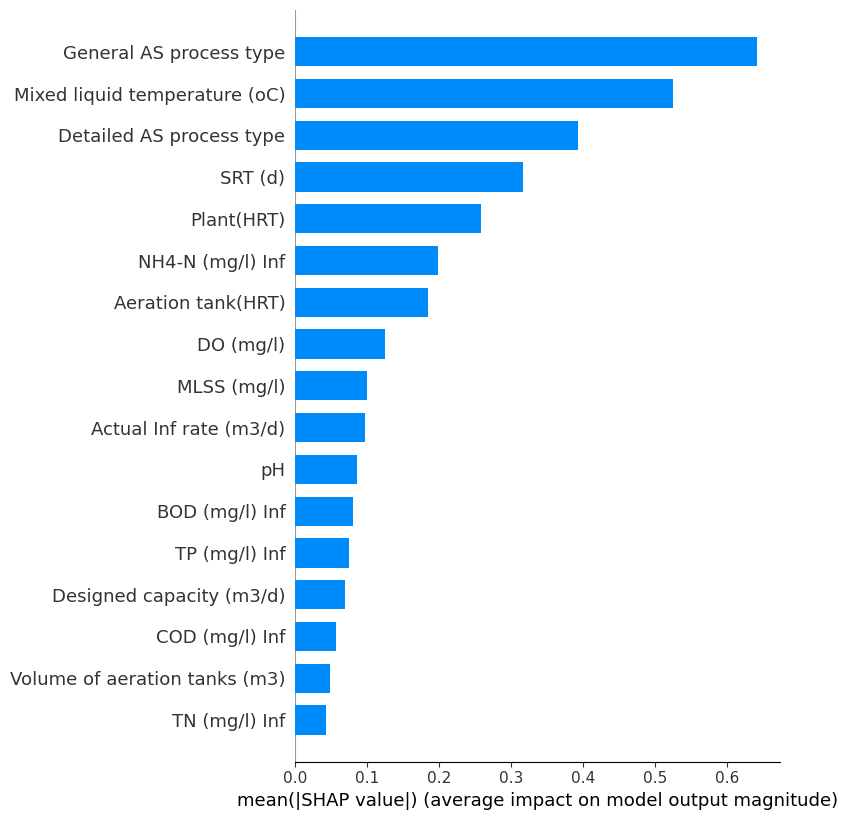

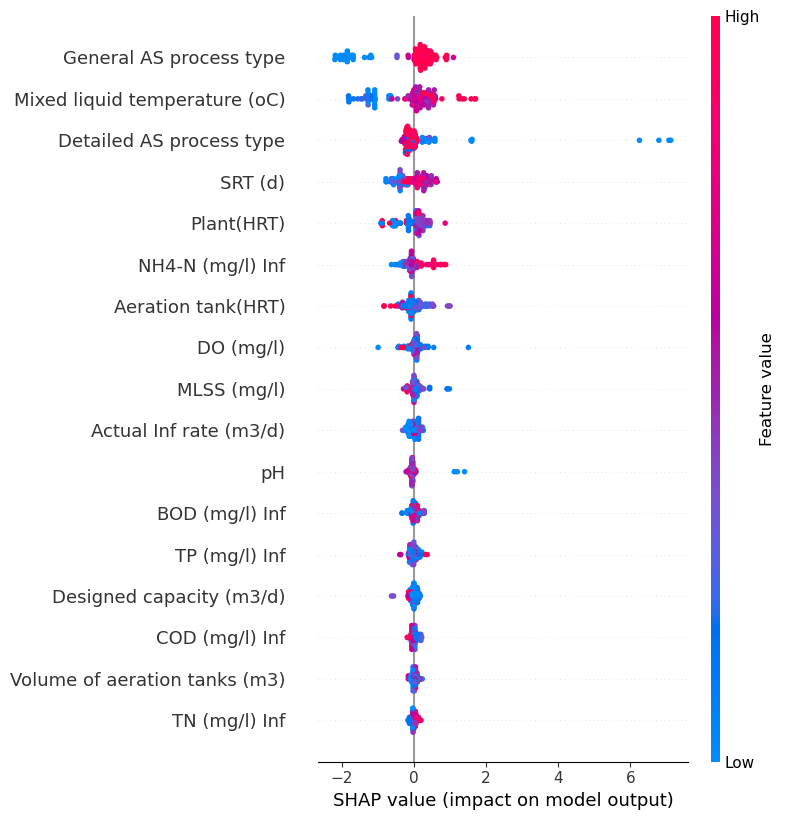

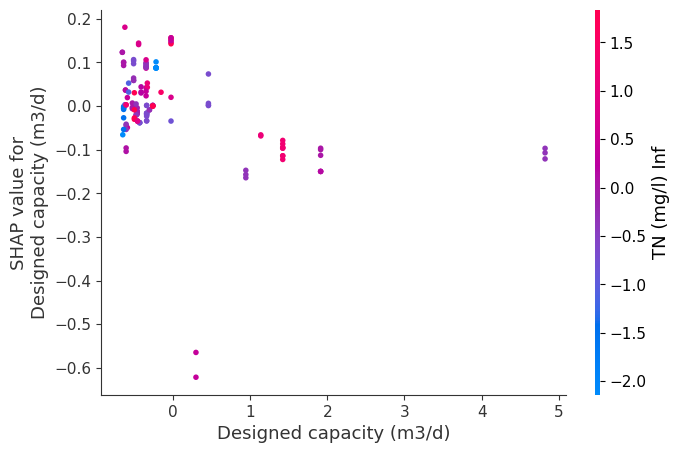

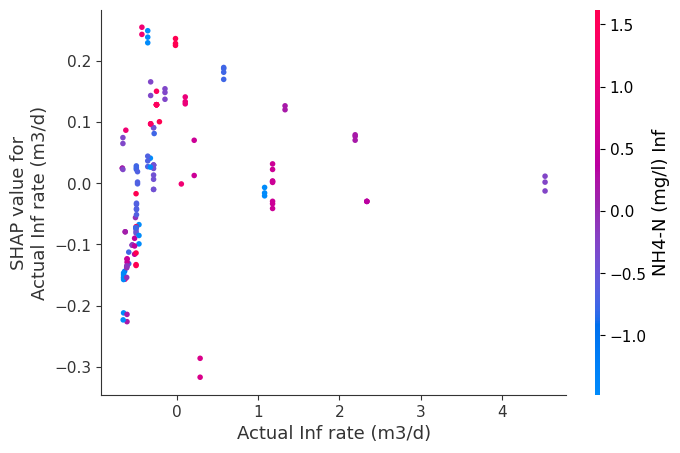

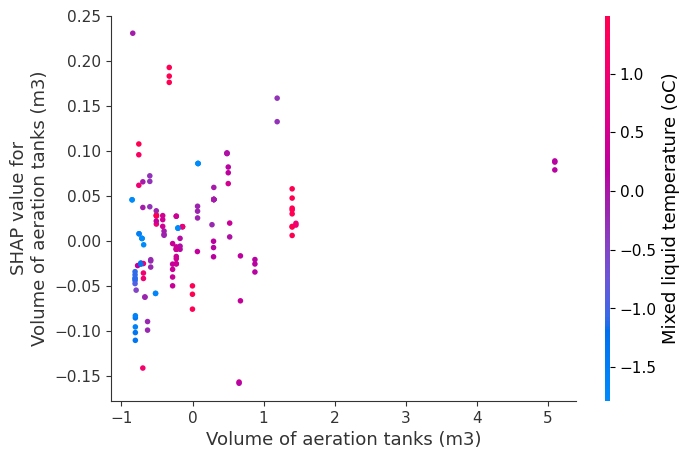

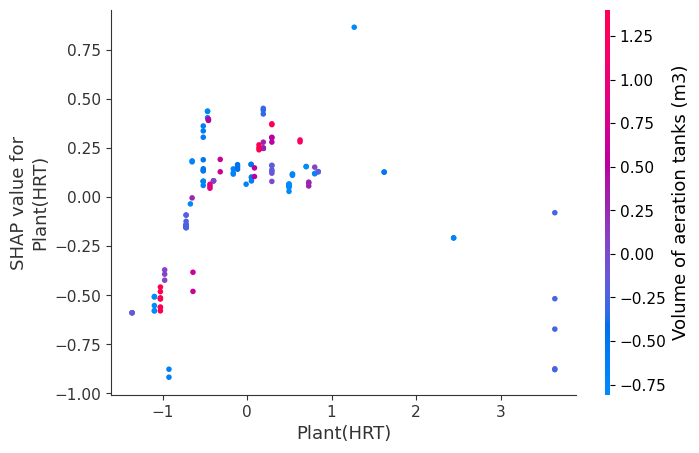

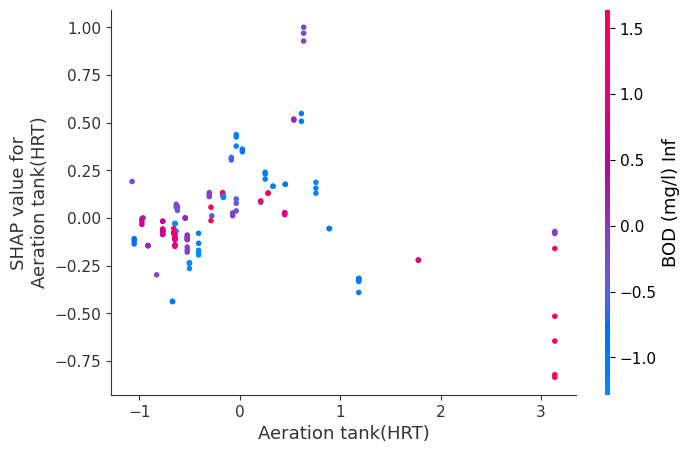

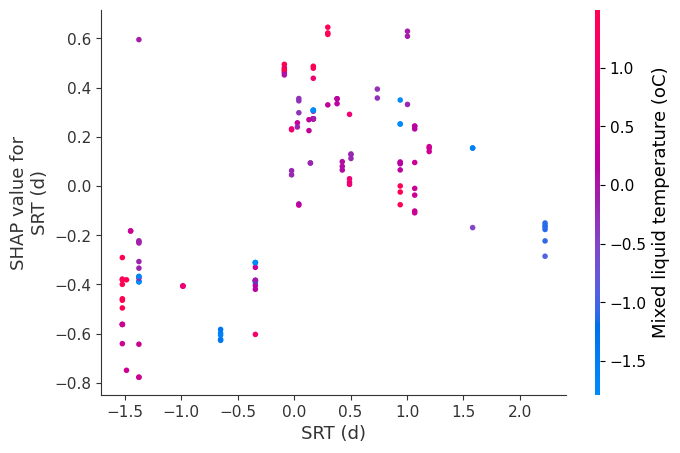

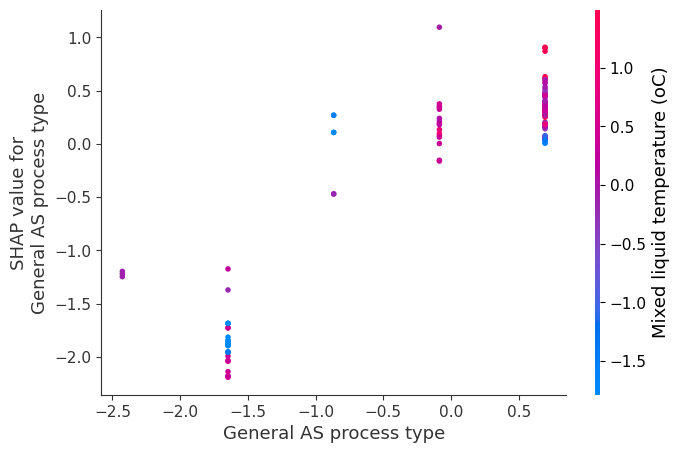

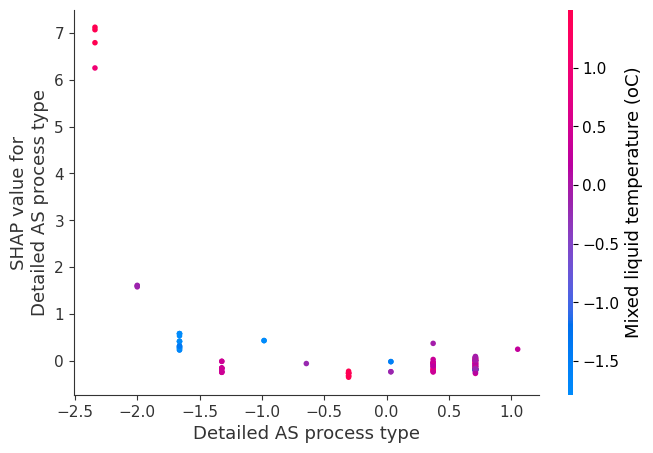

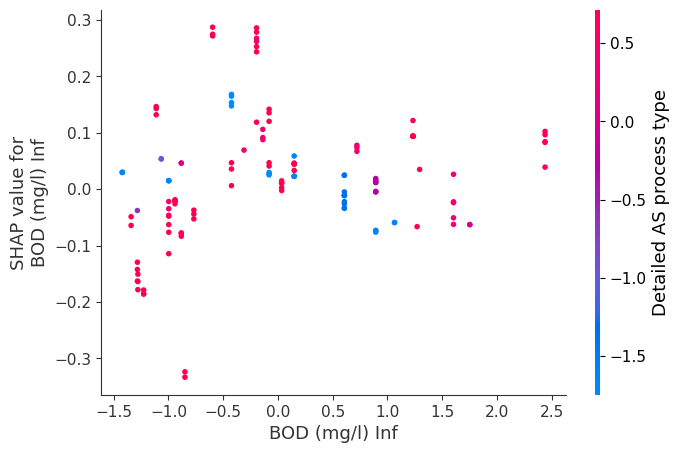

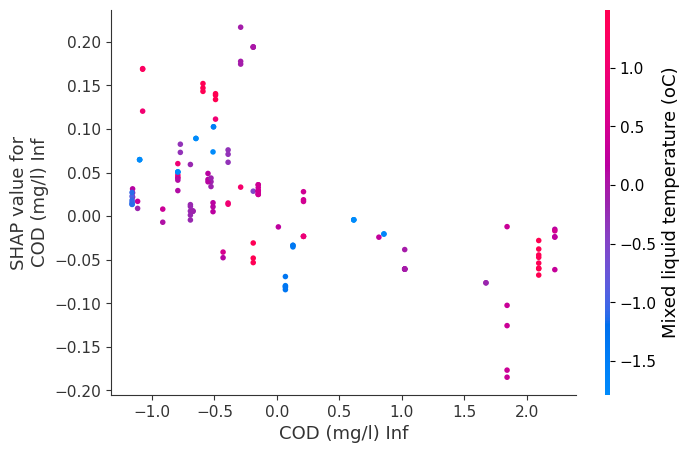

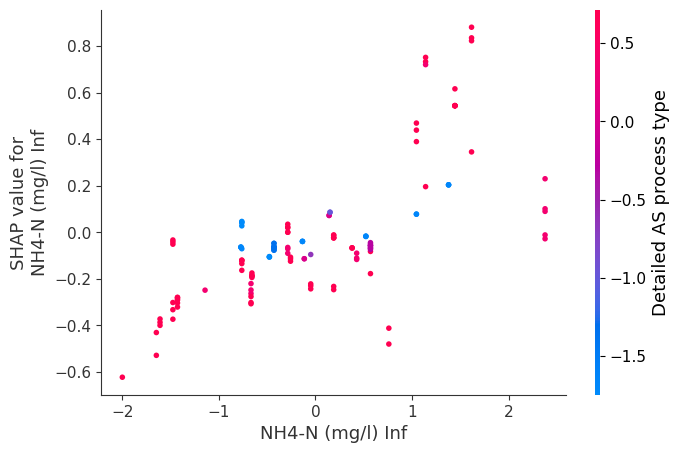

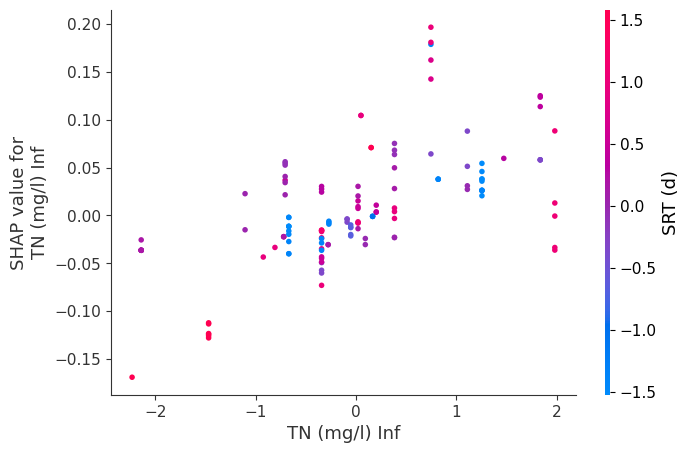

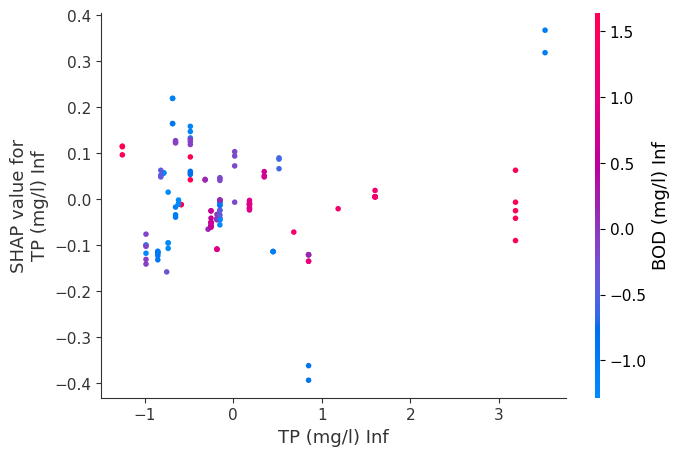

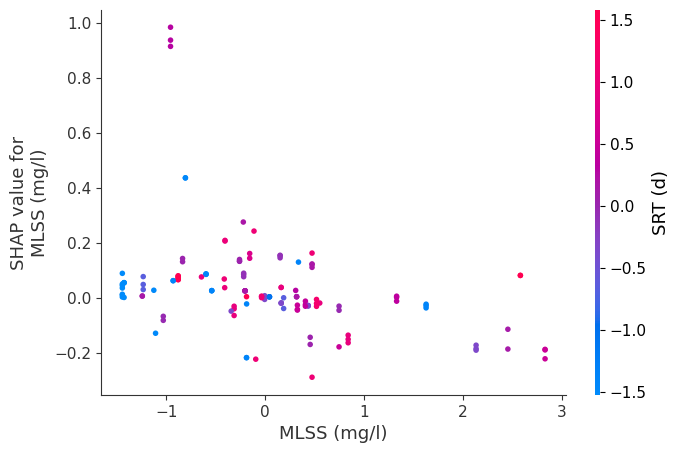

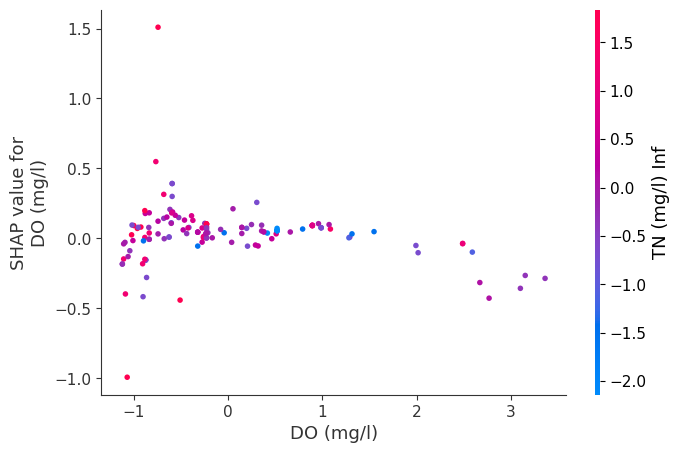

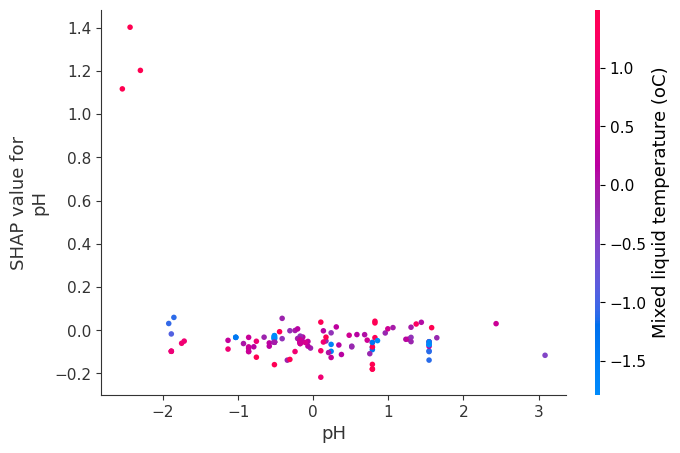

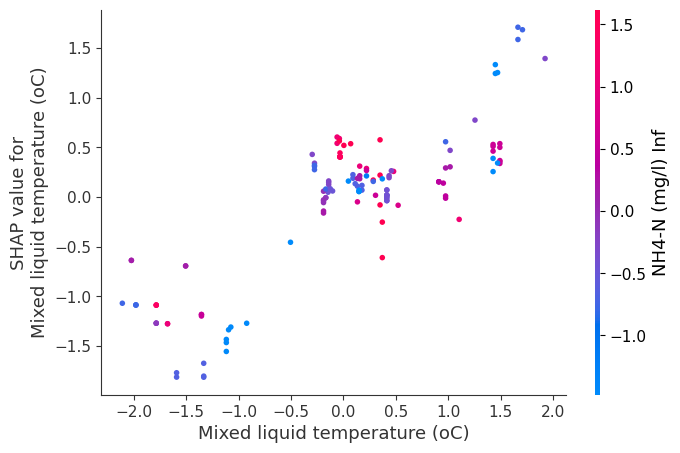


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝
 

Started LuciferML [ ✓ ]

Preprocessing Started [*]

Preprocessing Done [ ✓ ]

Training LuciferML [*]

Training Done [ ✓ ]

Results Below



Name   R2 Score  Mean Absolute Error  \
0                       Linear Regression   6.671888             5.510745   
1   Stochastic Gradient Descent Regressor   9.237935             5.523708   
2                   Elastic Net Regressor   0.846331             5.754523   
3                Bayesian Ridge Regressor   9.018235             5.541988   
4                Support Vector Regressor  15.614277             4.496323   
5                   K-Neighbors Regressor  47.597950             3.981473   
6                Decision Trees Regressor  86.975629             2.104948   
7                 Random Forest Regressor  75.380556             2.787997   
8                Gradient Boost Regressor  88.811448             1.931835   
9                      AdaBoost Regressor  70.895119             3.396528   
10                      Bagging Regressor  69.020874             2.993987   
11                  Extra Trees Regressor  82.000055             2.190548   
12                     LightGBM Regressor  73.611660             2.747451   
13                      XGBoost Regressor  75.885939             2.515348   
14                     Catboost Regressor  85.233953             2.095860   

    Root Mean Squared Error  KFold Accuracy  \
0                  7.337559       11.444687   
1                  7.235983       13.300919   
2                  7.563099       10.818174   
3                  7.244736       15.573726   
4                  6.977179       -0.130764   
5                  5.498187       25.277634   
6                  2.741093       56.934455   
7                  3.768639       71.516306   
8                  2.540577       70.059756   
9                  4.097588       66.394178   
10                 4.227464       65.902754   
11                 3.222411       77.575063   
12                 3.901678       71.454987   
13                 3.729757       75.223416   
14                 2.918620       75.808179   

                                                Model  
0                                  LinearRegression()  
1                                      SGDRegressor()  
2                                        ElasticNet()  
3                                     BayesianRidge()  
4                                               SVR()  
5                               KNeighborsRegressor()  
6                             DecisionTreeRegressor()  
7   (DecisionTreeRegressor(max_features='auto', ra...  
8   ([DecisionTreeRegressor(criterion='friedman_ms...  
9   (DecisionTreeRegressor(max_depth=3, random_sta...  
10  (DecisionTreeRegressor(random_state=1853995648...  
11  (ExtraTreeRegressor(random_state=255511728), E...  
12                                    LGBMRegressor()  
13  XGBRegressor(base_score=None, booster=None, ca...  
14  <catboost.core.CatBoostRegressor object at 0x0...


Completed LuciferML Run [ ✓ ]

Saved Best Model to lucifer_ml_info/best/regression/models/Extra_Trees_Regressor_1690765769.pkl and its scaler to lucifer_ml_info/best/regression/scalers/Extra_Trees_Regressor_Scaler_1690765769.pkl 

Time Elapsed :  47.20 seconds 



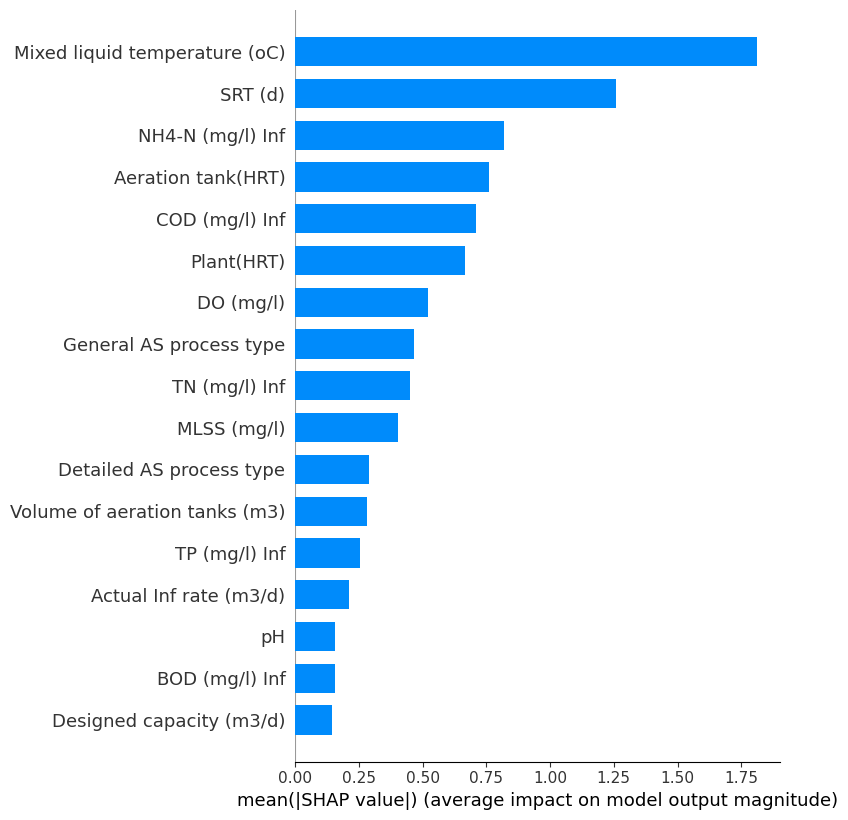

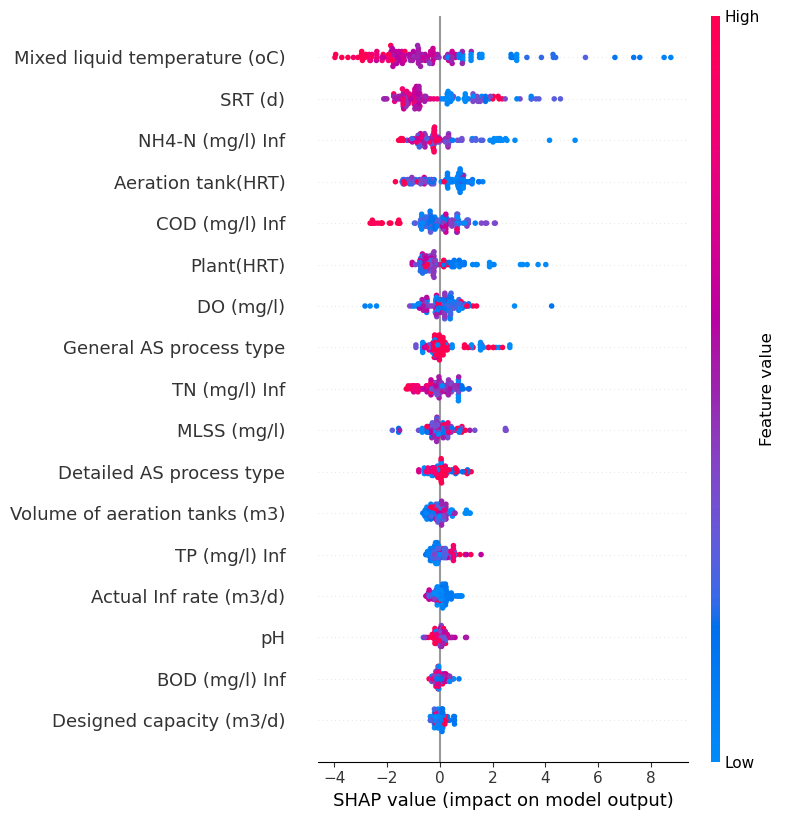

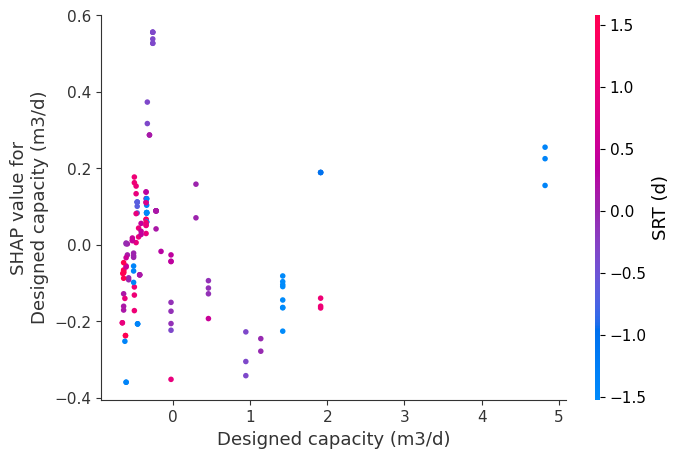

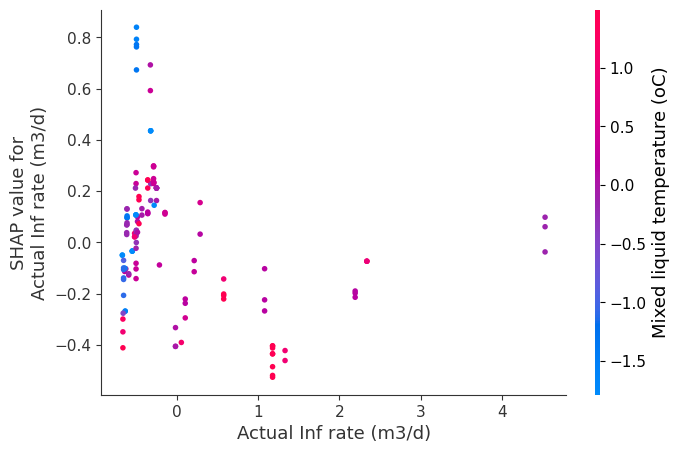

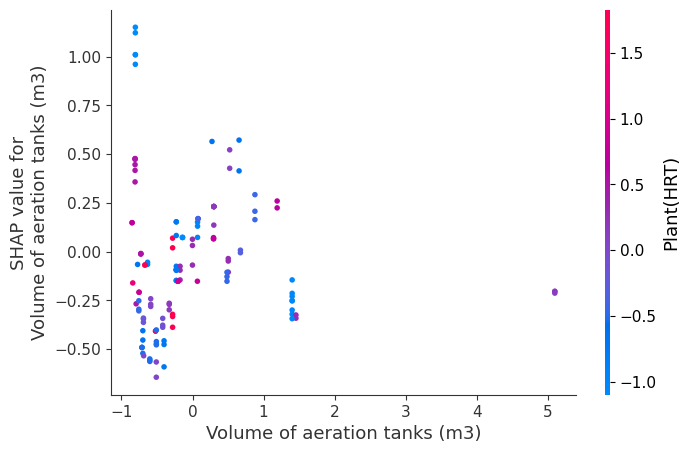

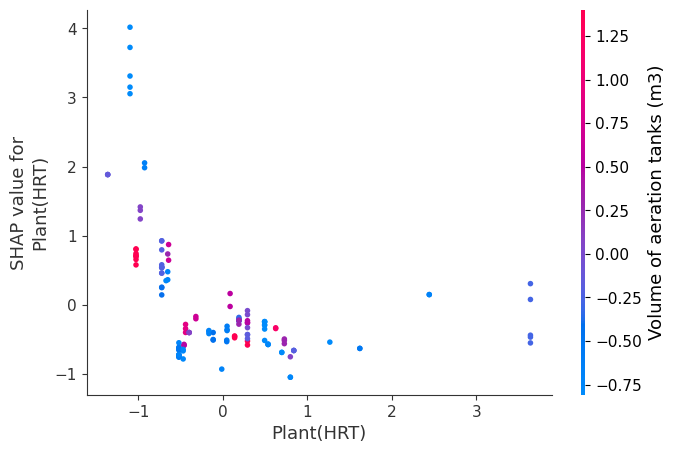

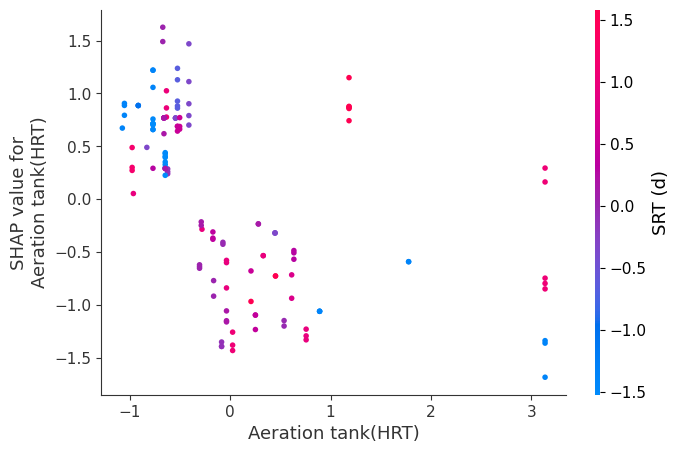

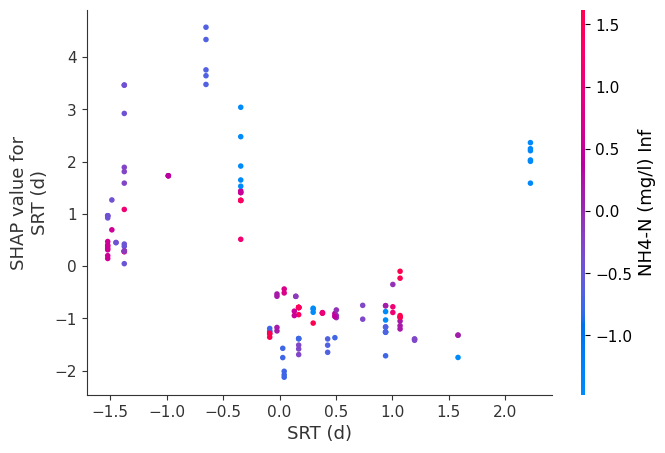

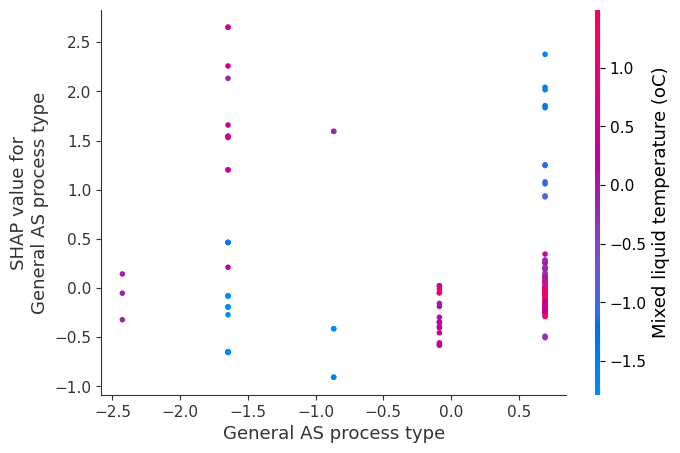

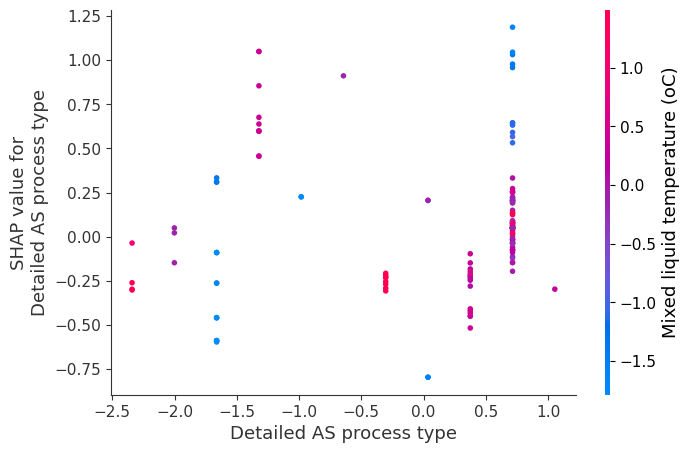

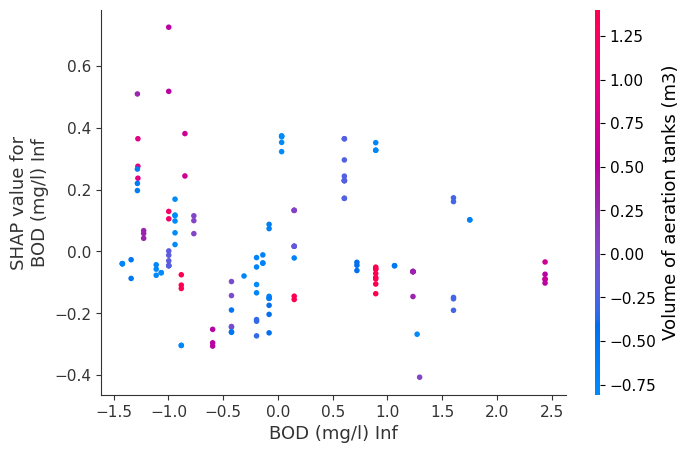

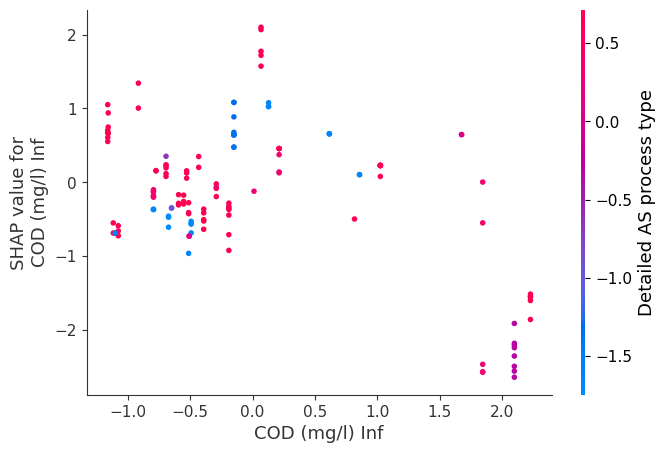

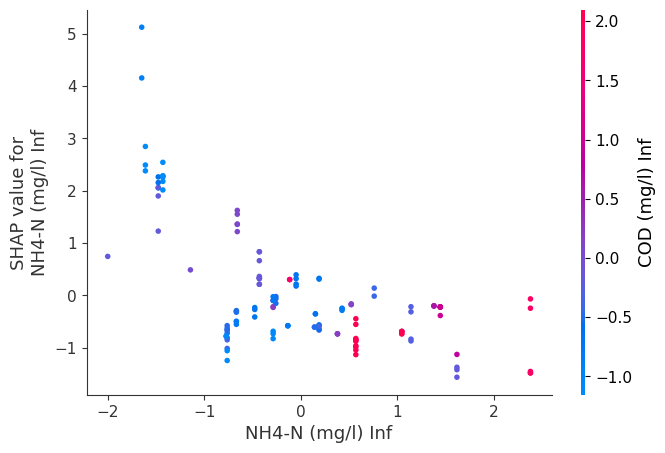

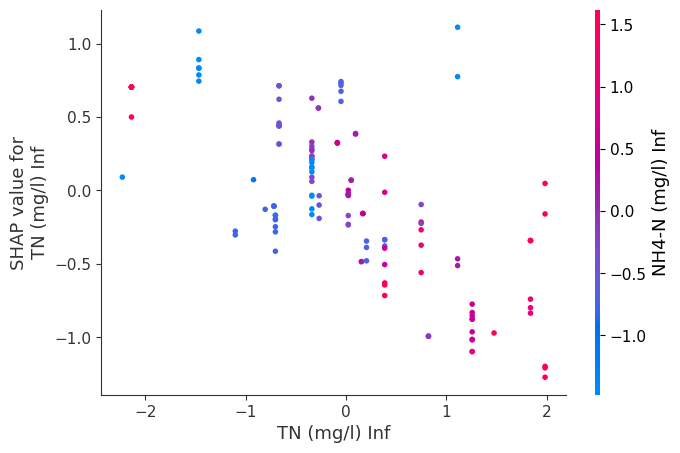

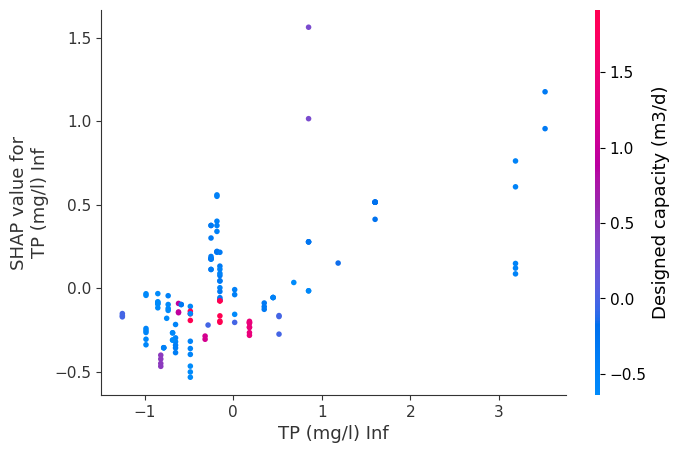

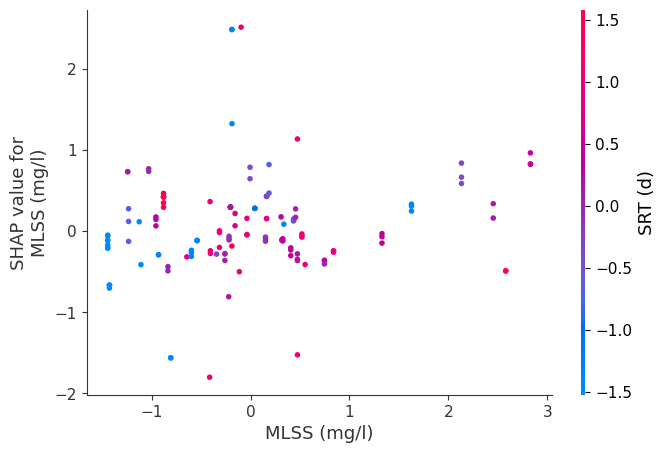

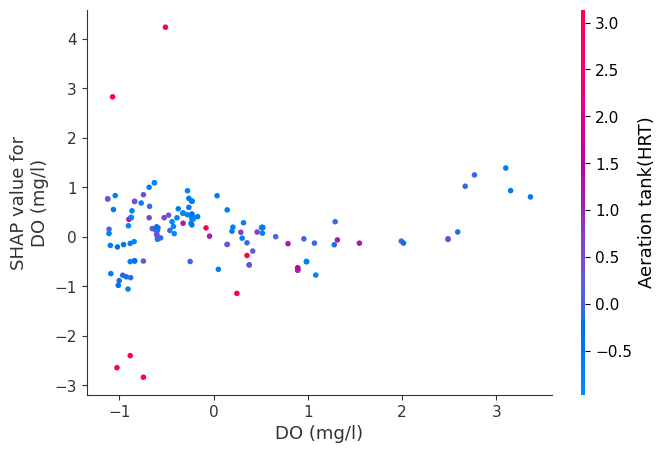

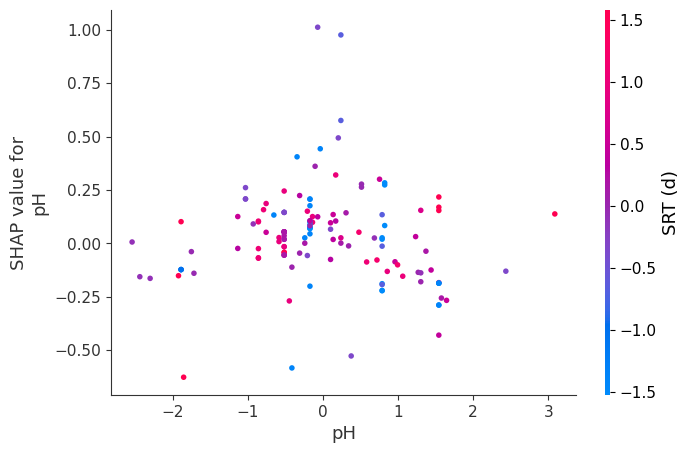

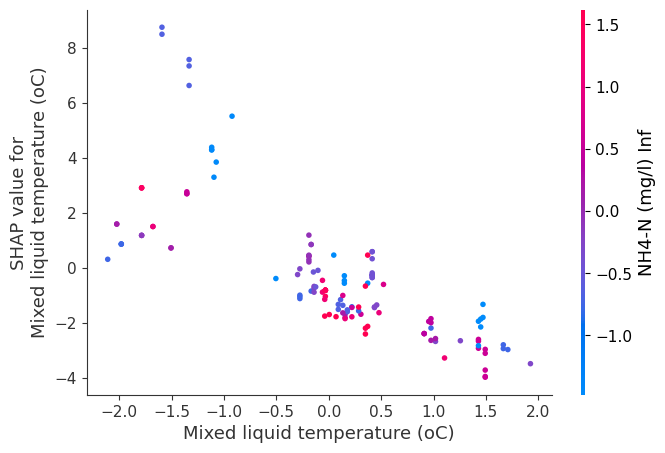


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝
 

Started LuciferML [ ✓ ]

Preprocessing Started [*]

Preprocessing Done [ ✓ ]

Training LuciferML [*]

Training Done [ ✓ ]

Results Below



Name   R2 Score  Mean Absolute Error  \
0                       Linear Regression  51.927532             4.018946   
1   Stochastic Gradient Descent Regressor  55.627905             3.937136   
2                   Elastic Net Regressor  50.293078             4.493563   
3                Bayesian Ridge Regressor  59.122905             3.919758   
4                Support Vector Regressor  44.369203             4.691506   
5                   K-Neighbors Regressor  44.583754             4.014174   
6                Decision Trees Regressor  73.307050             2.353813   
7                 Random Forest Regressor  86.276223             2.201111   
8                Gradient Boost Regressor  88.070900             1.932186   
9                      AdaBoost Regressor  77.509285             3.024110   
10                      Bagging Regressor  81.114380             2.616875   
11                  Extra Trees Regressor  87.950579             1.910212   
12                     LightGBM Regressor  87.347128             2.137224   
13                      XGBoost Regressor  88.021063             1.907042   
14                     Catboost Regressor  84.801037             2.096914   

    Root Mean Squared Error  KFold Accuracy  \
0                  5.376770       43.655508   
1                  5.165689       43.049178   
2                  5.467411       45.529212   
3                  4.958077       45.479710   
4                  5.784035       35.324077   
5                  5.772871       54.388471   
6                  4.006559       72.291663   
7                  2.872831       81.102331   
8                  2.678410       85.366747   
9                  3.677688       75.195194   
10                 3.370070       78.095933   
11                 2.691884       81.574878   
12                 2.758467       77.835516   
13                 2.683999       81.067980   
14                 3.023293       86.507990   

                                                Model  
0                                  LinearRegression()  
1                                      SGDRegressor()  
2                                        ElasticNet()  
3                                     BayesianRidge()  
4                                               SVR()  
5                               KNeighborsRegressor()  
6                             DecisionTreeRegressor()  
7   (DecisionTreeRegressor(max_features='auto', ra...  
8   ([DecisionTreeRegressor(criterion='friedman_ms...  
9   (DecisionTreeRegressor(max_depth=3, random_sta...  
10  (DecisionTreeRegressor(random_state=292504985)...  
11  (ExtraTreeRegressor(random_state=1824395211), ...  
12                                    LGBMRegressor()  
13  XGBRegressor(base_score=None, booster=None, ca...  
14  <catboost.core.CatBoostRegressor object at 0x0...


Completed LuciferML Run [ ✓ ]

Saved Best Model to lucifer_ml_info/best/regression/models/Catboost_Regressor_1690765791.pkl and its scaler to lucifer_ml_info/best/regression/scalers/Catboost_Regressor_Scaler_1690765791.pkl 

Time Elapsed :  16.74 seconds 



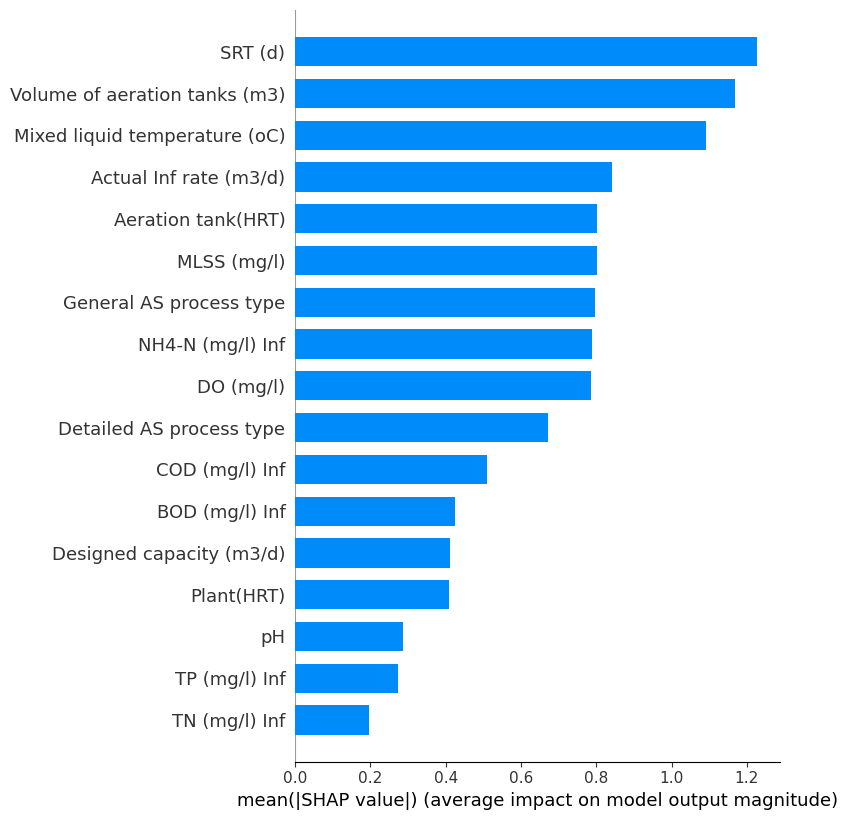

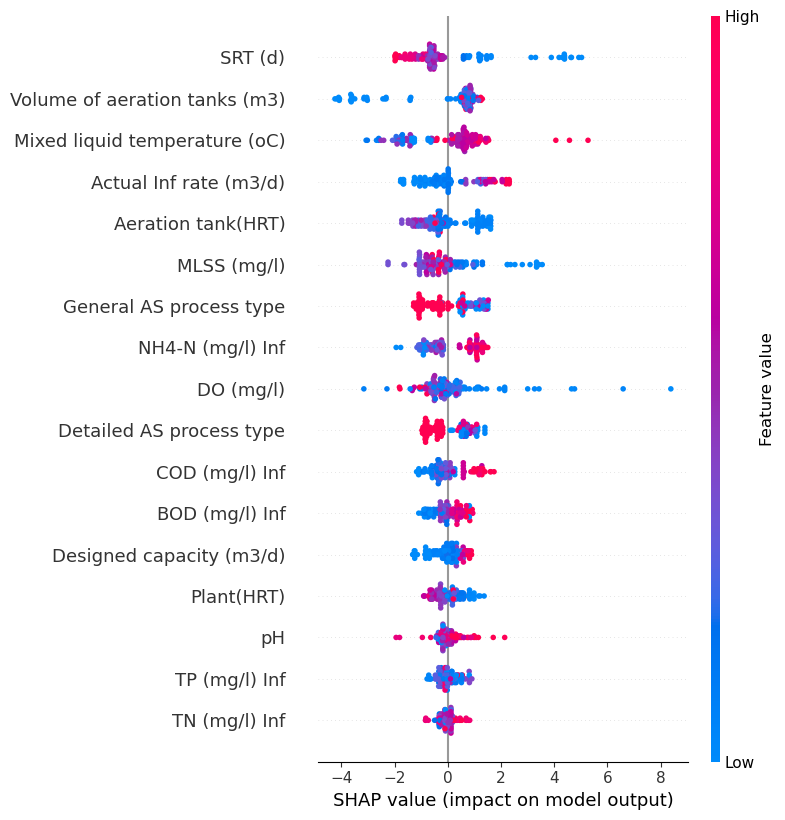

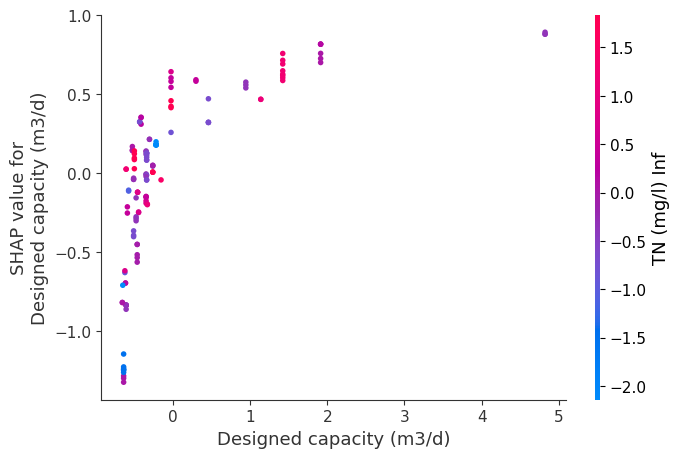

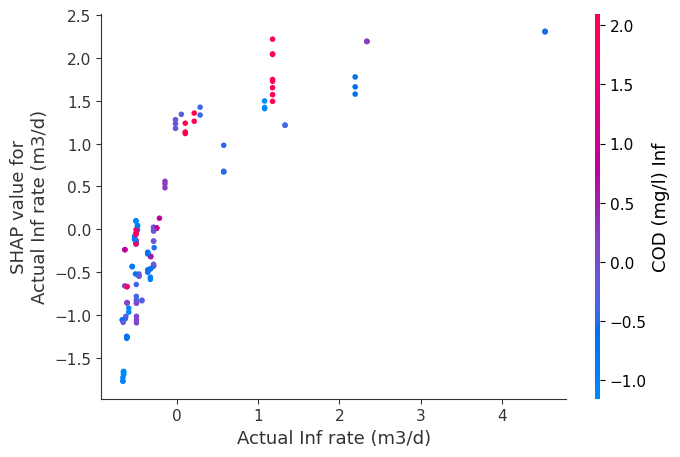

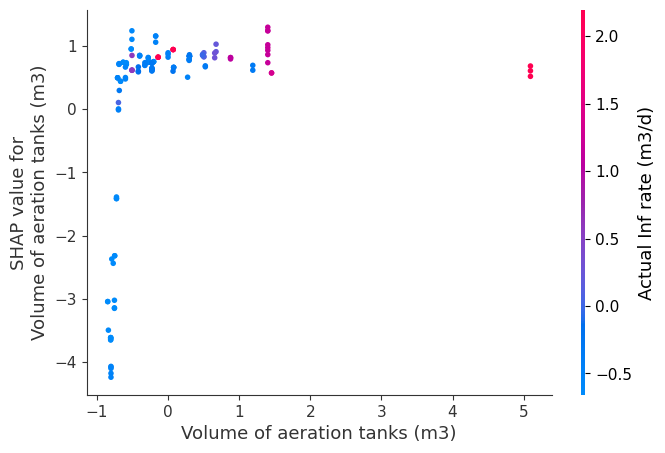

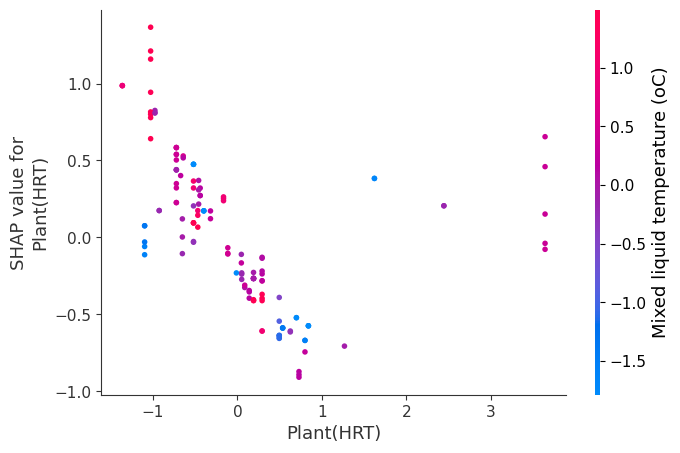

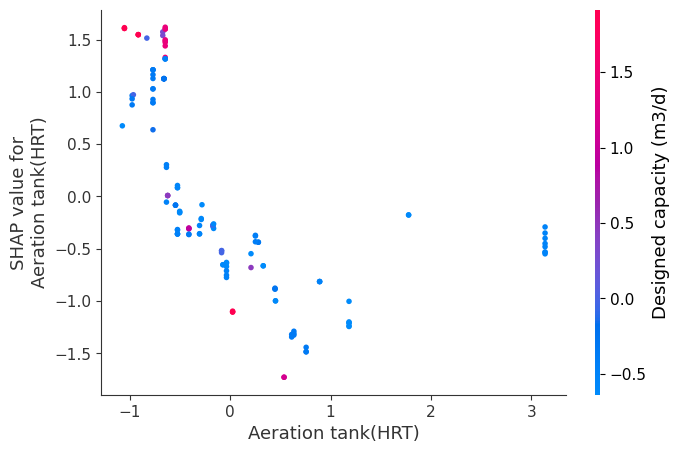

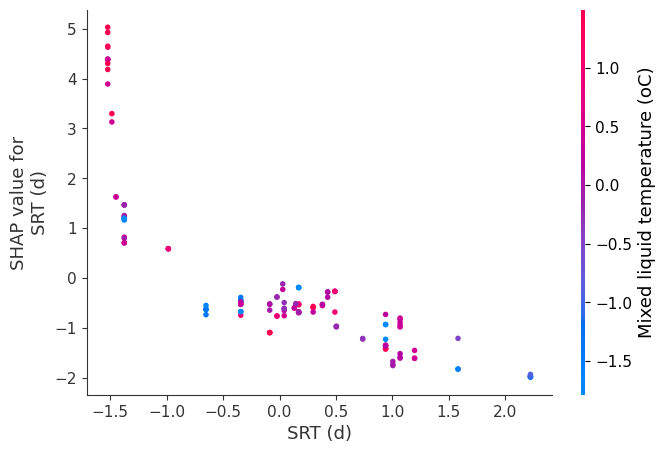

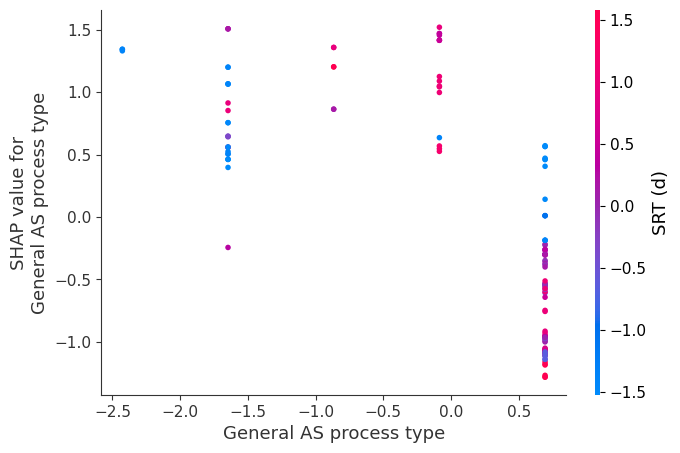

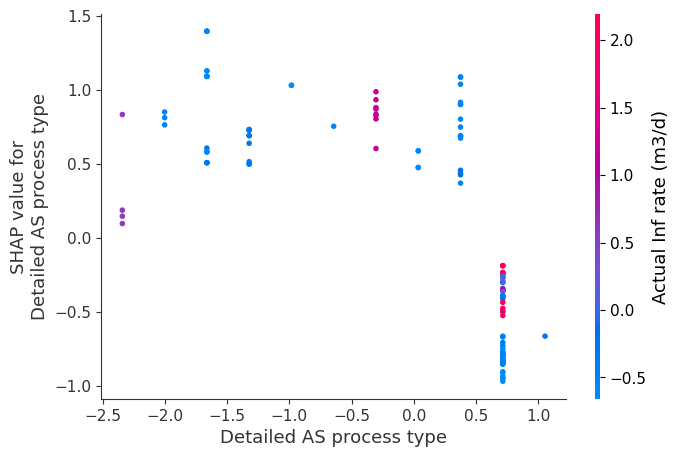

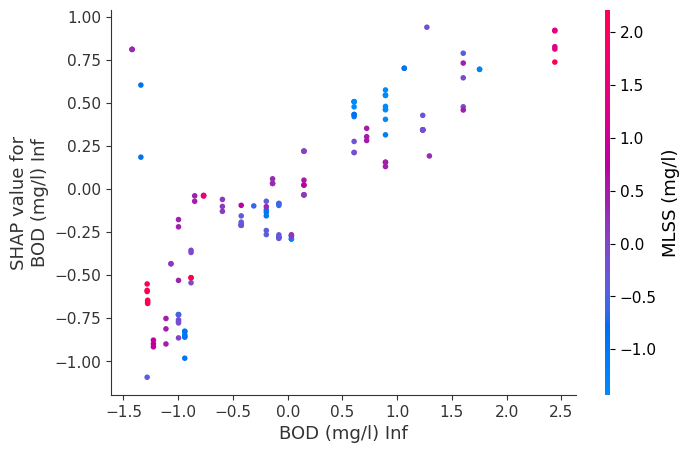

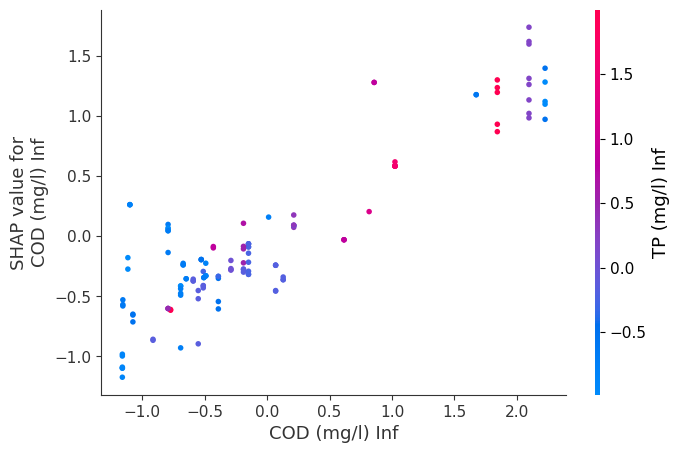

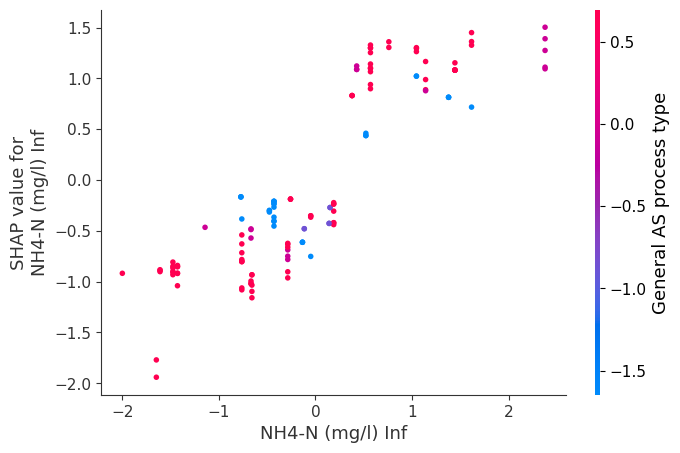

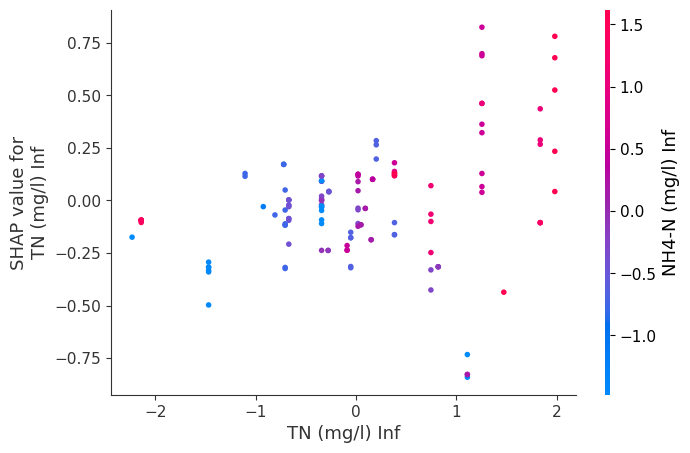

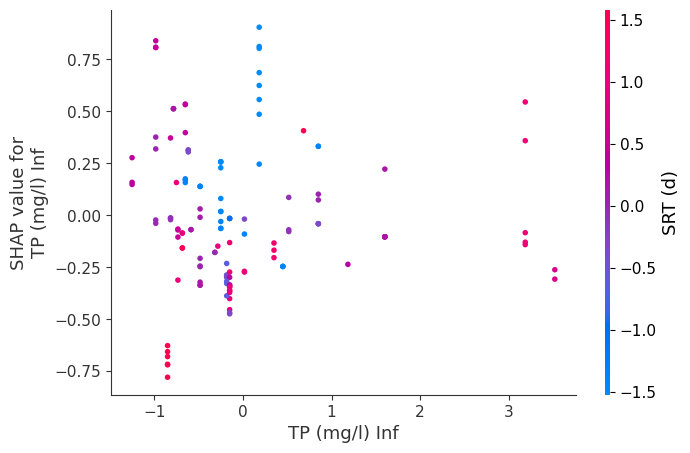

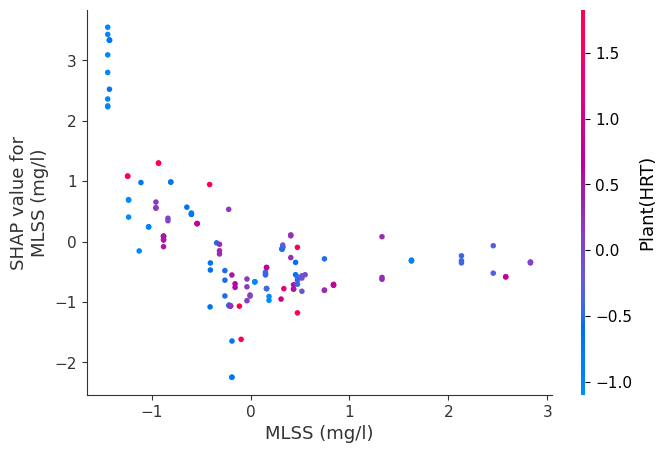

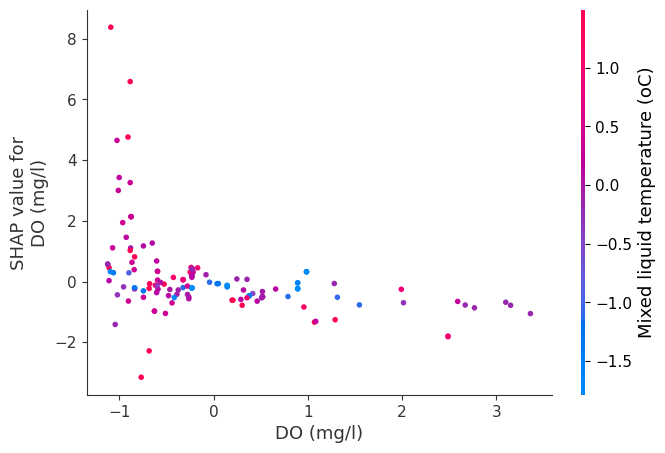

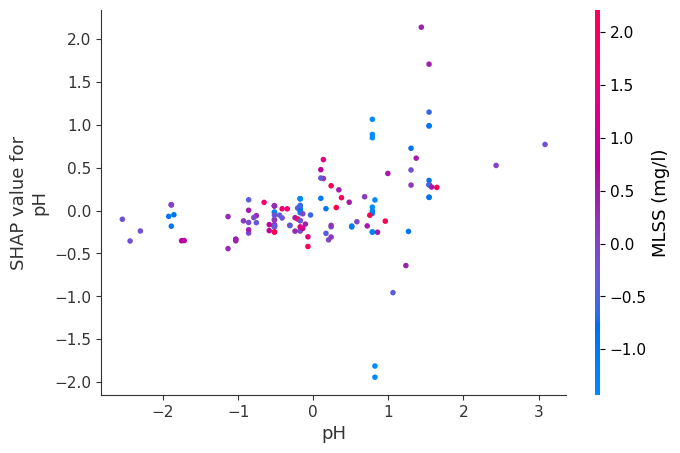

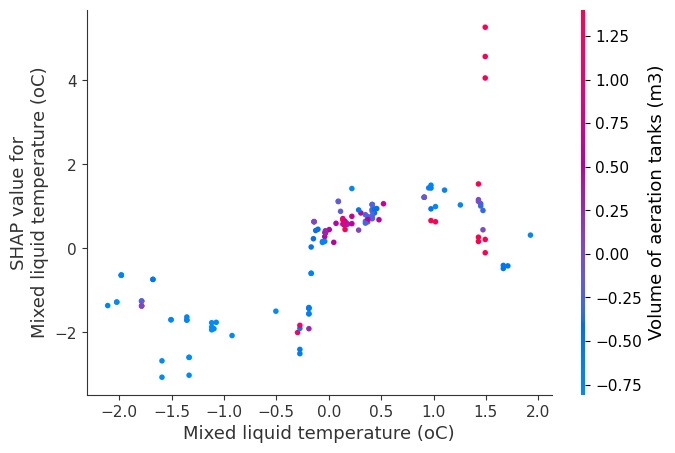


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝
 

Started LuciferML [ ✓ ]

Preprocessing Started [*]

Preprocessing Done [ ✓ ]

Training LuciferML [*]

Training Done [ ✓ ]

Results Below



Name   R2 Score  Mean Absolute Error  \
0                       Linear Regression   6.649908             1.080073   
1   Stochastic Gradient Descent Regressor   9.158881             1.054550   
2                   Elastic Net Regressor   9.587161             0.971006   
3                Bayesian Ridge Regressor  20.972108             0.909741   
4                Support Vector Regressor  37.823272             0.640113   
5                   K-Neighbors Regressor  -3.290984             0.904174   
6                Decision Trees Regressor  58.915866             0.460417   
7                 Random Forest Regressor  63.671043             0.430118   
8                Gradient Boost Regressor  69.039667             0.391358   
9                      AdaBoost Regressor  36.510366             0.782299   
10                      Bagging Regressor  52.703568             0.568151   
11                  Extra Trees Regressor  68.493583             0.352799   
12                     LightGBM Regressor  67.084582             0.538286   
13                      XGBoost Regressor  65.816564             0.442526   
14                     Catboost Regressor  64.859816             0.381684   

    Root Mean Squared Error  KFold Accuracy  \
0                  1.370383      -29.208250   
1                  1.351842      -22.900694   
2                  1.348652      -22.169904   
3                  1.260883       -8.360215   
4                  1.118404       39.189703   
5                  1.441504      -56.696136   
6                  0.909121       48.661248   
7                  0.854892       78.706522   
8                  0.789201       84.469303   
9                  1.130150       74.527809   
10                 0.975436       58.966023   
11                 0.796130       87.624108   
12                 0.813738       59.583866   
13                 0.829264       85.273799   
14                 0.840788       85.342928   

                                                Model  
0                                  LinearRegression()  
1                                      SGDRegressor()  
2                                        ElasticNet()  
3                                     BayesianRidge()  
4                                               SVR()  
5                               KNeighborsRegressor()  
6                             DecisionTreeRegressor()  
7   (DecisionTreeRegressor(max_features='auto', ra...  
8   ([DecisionTreeRegressor(criterion='friedman_ms...  
9   (DecisionTreeRegressor(max_depth=3, random_sta...  
10  (DecisionTreeRegressor(random_state=1363701619...  
11  (ExtraTreeRegressor(random_state=267654056), E...  
12                                    LGBMRegressor()  
13  XGBRegressor(base_score=None, booster=None, ca...  
14  <catboost.core.CatBoostRegressor object at 0x0...


Completed LuciferML Run [ ✓ ]

Saved Best Model to lucifer_ml_info/best/regression/models/Extra_Trees_Regressor_1690765808.pkl and its scaler to lucifer_ml_info/best/regression/scalers/Extra_Trees_Regressor_Scaler_1690765808.pkl 

Time Elapsed :  13.18 seconds 



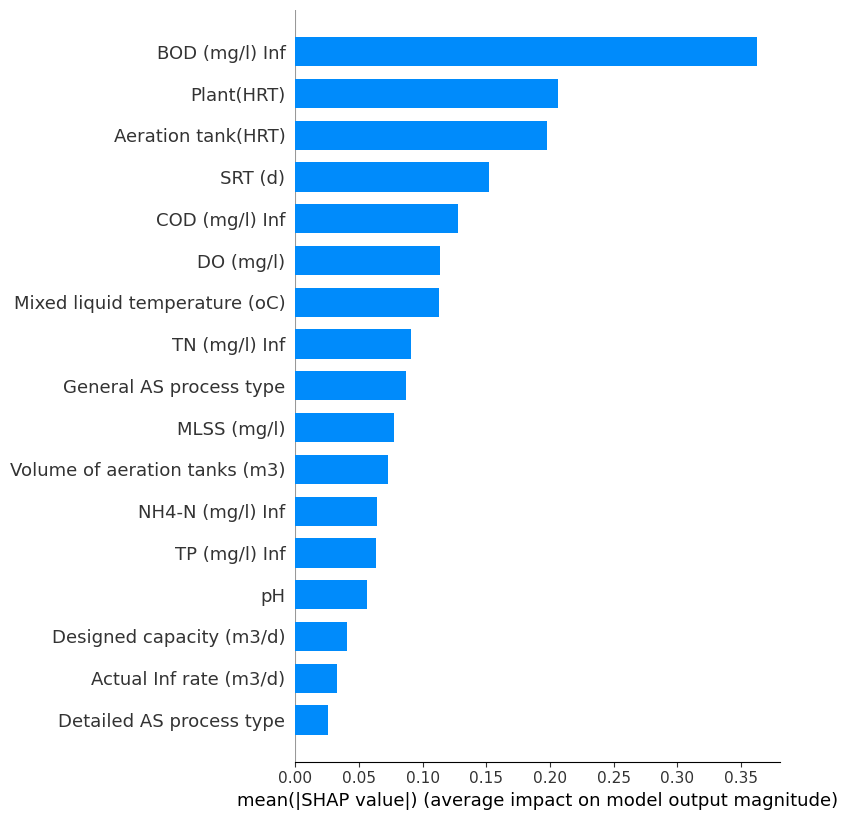

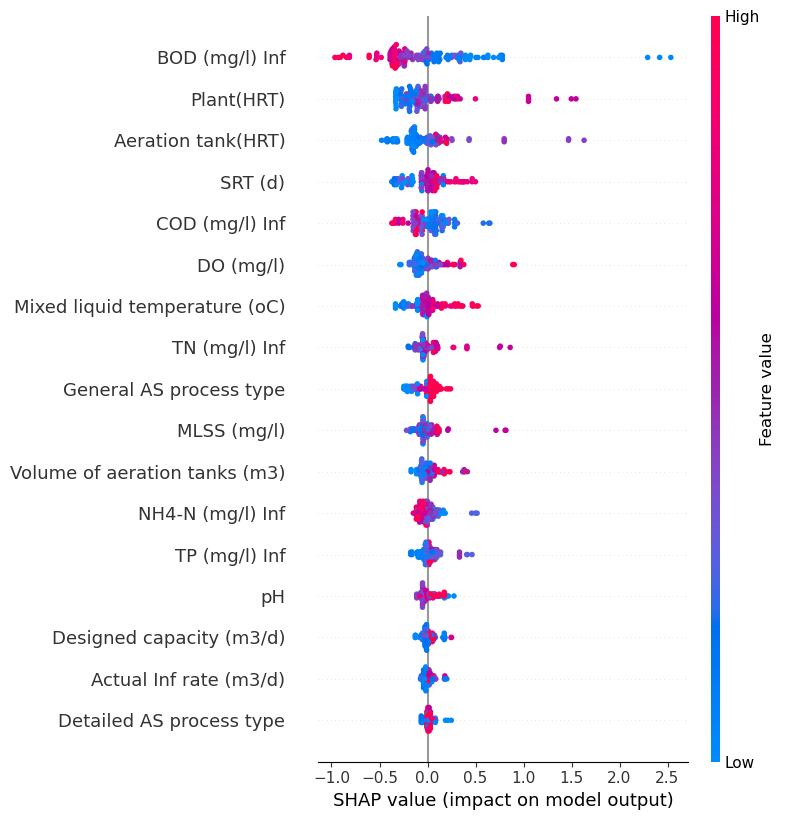

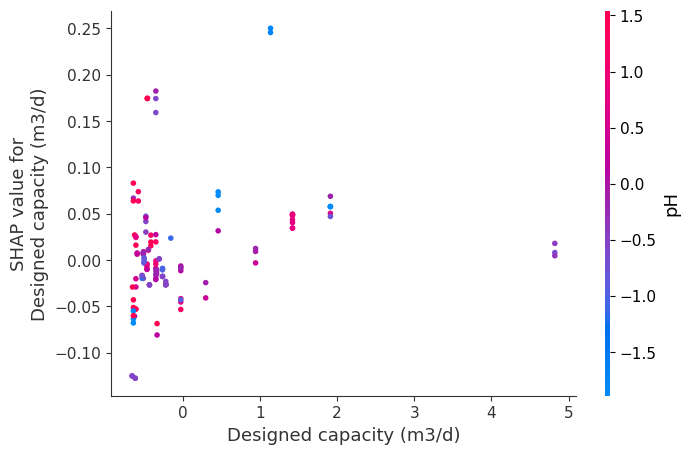

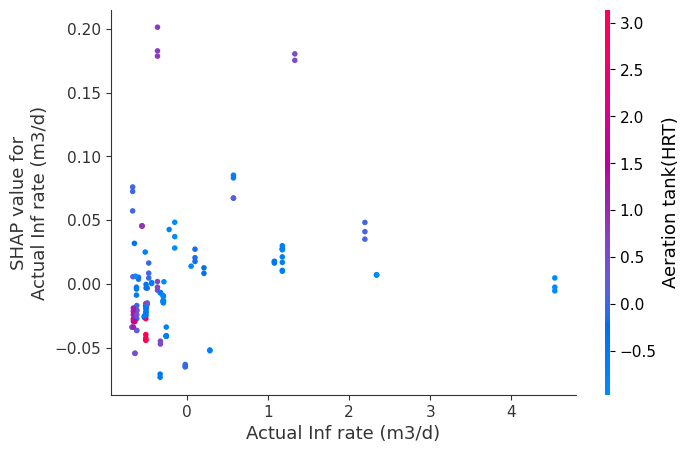

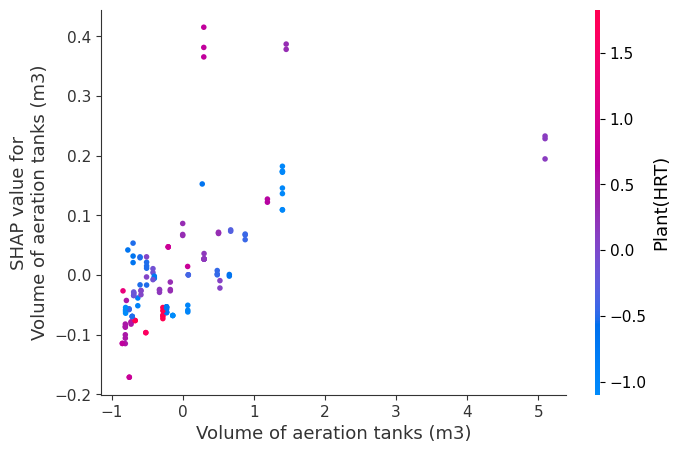

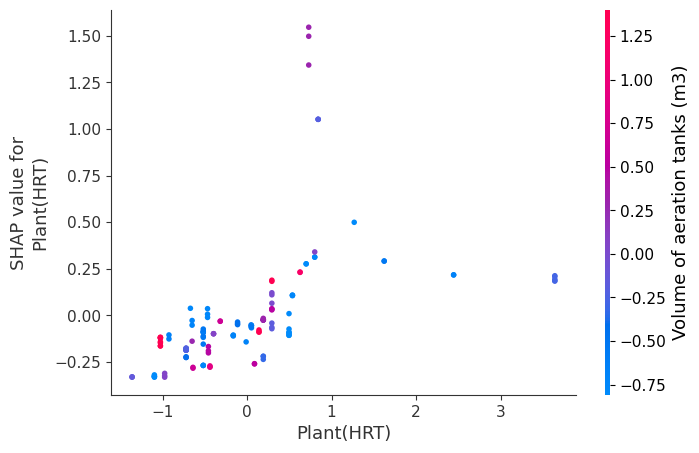

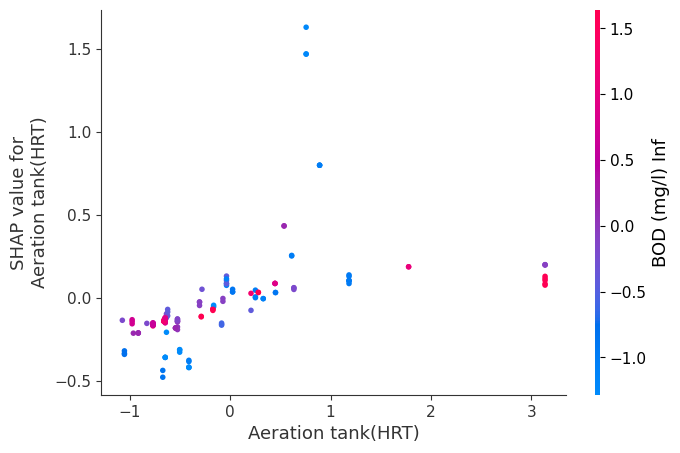

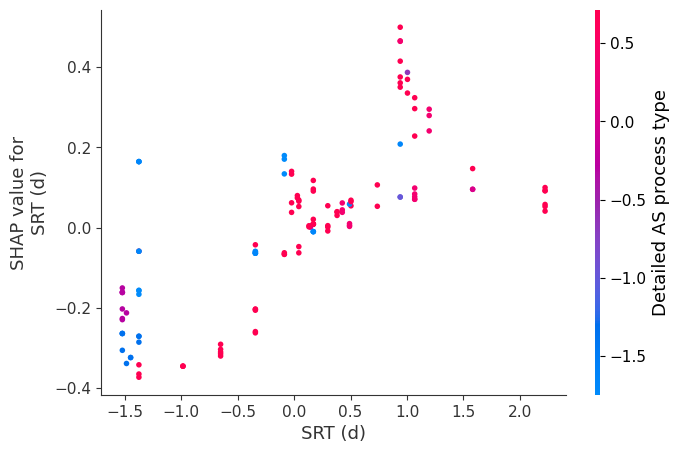

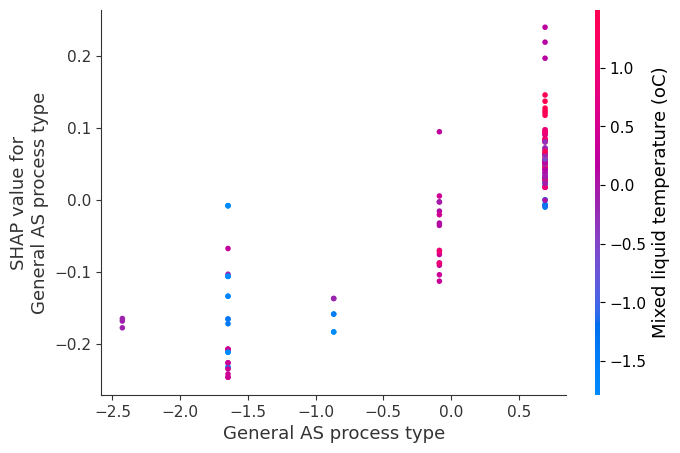

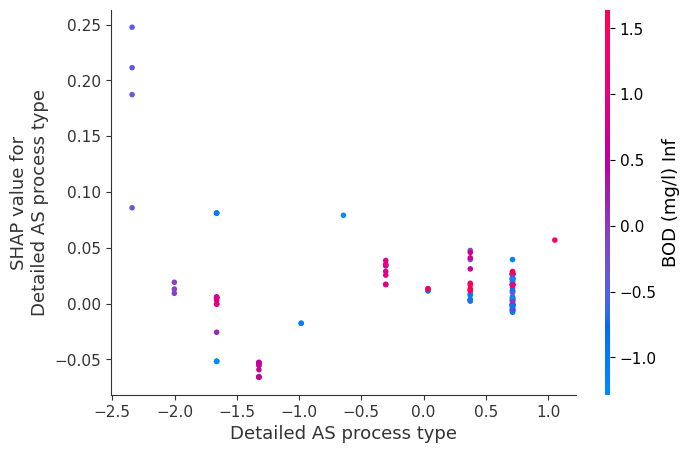

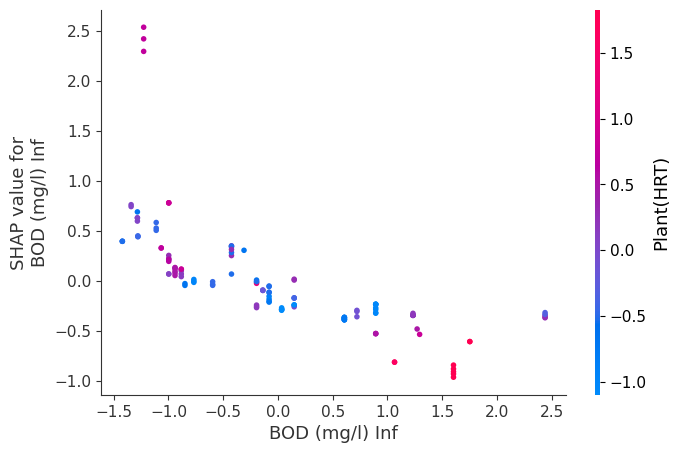

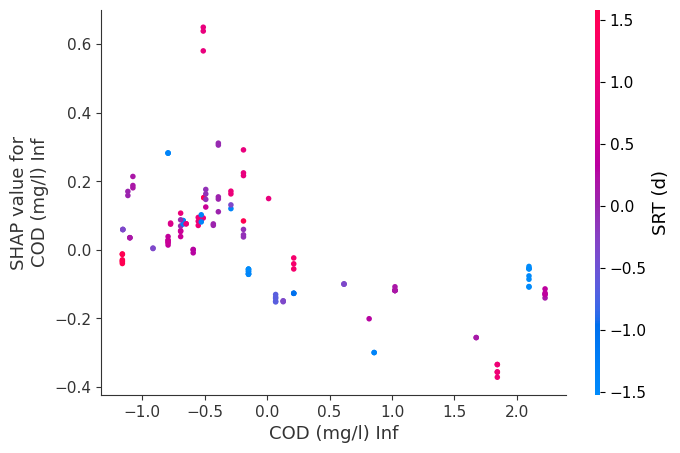

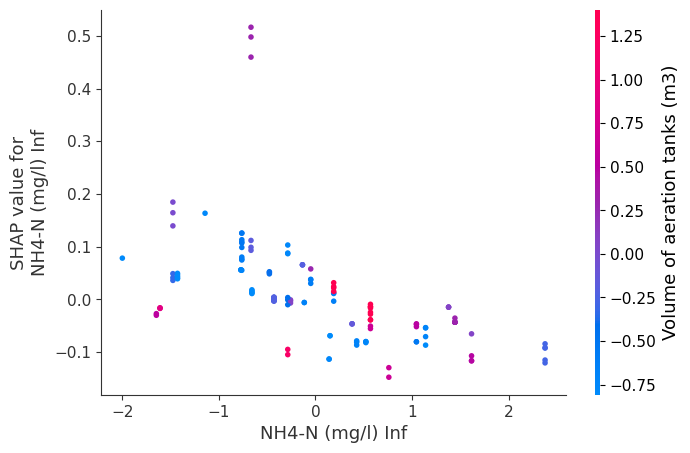

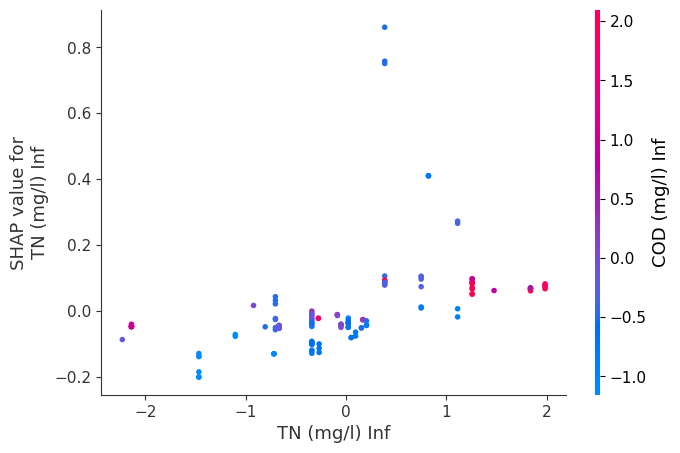

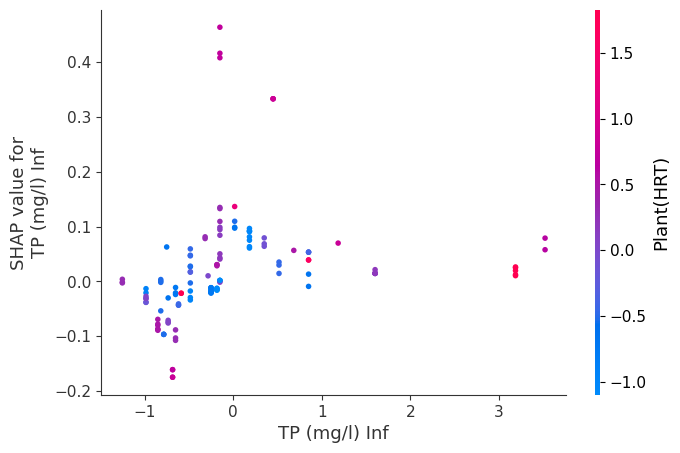

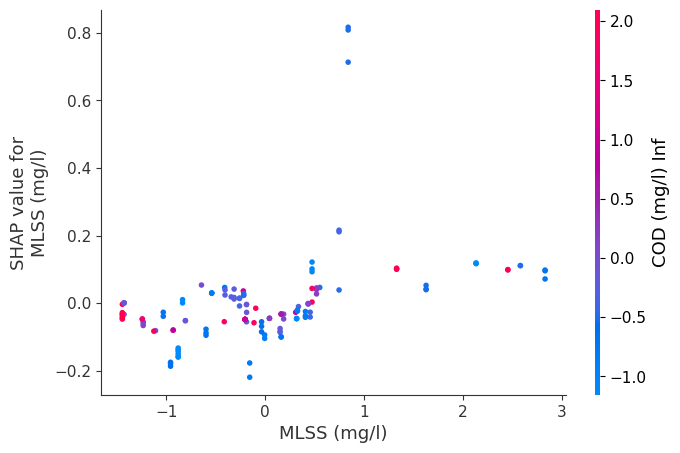

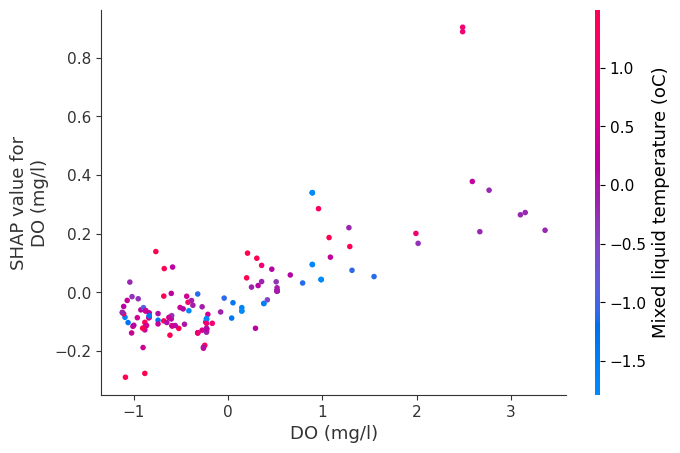

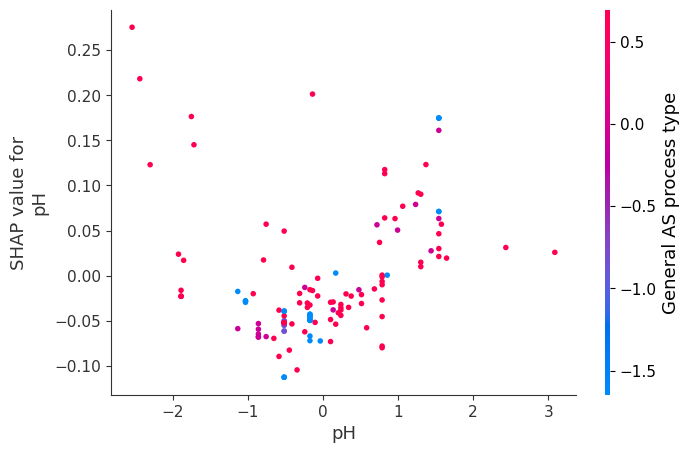

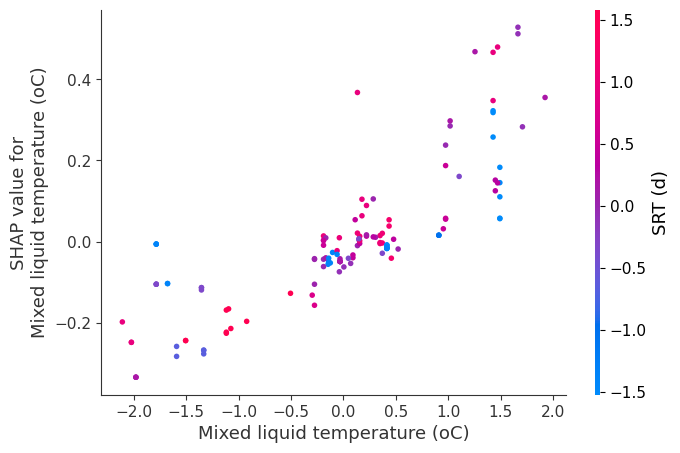


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝
 

Started LuciferML [ ✓ ]

Preprocessing Started [*]

Preprocessing Done [ ✓ ]

Training LuciferML [*]

Training Done [ ✓ ]

Results Below



Name   R2 Score  Mean Absolute Error  \
0                       Linear Regression  35.394607             0.190864   
1   Stochastic Gradient Descent Regressor  47.785723             0.167334   
2                   Elastic Net Regressor  -4.763558             0.238510   
3                Bayesian Ridge Regressor  44.681612             0.175782   
4                Support Vector Regressor  68.620973             0.122966   
5                   K-Neighbors Regressor  66.837446             0.144933   
6                Decision Trees Regressor  62.513617             0.142839   
7                 Random Forest Regressor  70.127526             0.111356   
8                Gradient Boost Regressor  65.982209             0.122236   
9                      AdaBoost Regressor  66.372308             0.130548   
10                      Bagging Regressor  67.761095             0.131113   
11                  Extra Trees Regressor  65.546172             0.123072   
12                     LightGBM Regressor  58.057181             0.150030   
13                      XGBoost Regressor  61.139709             0.129196   
14                     Catboost Regressor  66.064245             0.120680   

    Root Mean Squared Error  KFold Accuracy  \
0                  0.260848      -17.618540   
1                  0.234503       -3.090751   
2                  0.332169      -23.460185   
3                  0.241373       -5.482253   
4                  0.181791       59.150202   
5                  0.186886       10.924503   
6                  0.198697       14.834971   
7                  0.177374       50.754434   
8                  0.189281       37.915679   
9                  0.188192       34.716733   
10                 0.184265       45.862148   
11                 0.190490       47.695381   
12                 0.210176       49.876671   
13                 0.202305       34.099790   
14                 0.189052       50.248563   

                                                Model  
0                                  LinearRegression()  
1                                      SGDRegressor()  
2                                        ElasticNet()  
3                                     BayesianRidge()  
4                                               SVR()  
5                               KNeighborsRegressor()  
6                             DecisionTreeRegressor()  
7   (DecisionTreeRegressor(max_features='auto', ra...  
8   ([DecisionTreeRegressor(criterion='friedman_ms...  
9   (DecisionTreeRegressor(max_depth=3, random_sta...  
10  (DecisionTreeRegressor(random_state=1664442062...  
11  (ExtraTreeRegressor(random_state=139407841), E...  
12                                    LGBMRegressor()  
13  XGBRegressor(base_score=None, booster=None, ca...  
14  <catboost.core.CatBoostRegressor object at 0x0...


Completed LuciferML Run [ ✓ ]

Saved Best Model to lucifer_ml_info/best/regression/models/Support_Vector_Regressor_1690765825.pkl and its scaler to lucifer_ml_info/best/regression/scalers/Support_Vector_Regressor_Scaler_1690765825.pkl 

Time Elapsed :  13.21 seconds 



InvalidModelError: Model type not yet supported by TreeExplainer: <class 'sklearn.svm._classes.SVR'>

In [33]:
all_bacteria_labels = ['Unclassified', 'Burkholderiales', 'Chitinophagales', 'Others', 'Rickettsiales', 'Bacteroidales', 'Chlamydiales', 'Sphingobacteriales', 'Bdellovibrionales', 'Polyangiales', 'Rhizobiales', 'Oscillospirales', 'Anaerolineales', '0319-6G20', 'Pseudomonadales', 'Gemmatales', 'Cytophagales', 'Babeliales', 'Pirellulales', 'Flavobacteriales', 'SBR1031', 'Pedosphaerales', 'Xanthomonadales', 'Phycisphaerales', 'Haliangiales', 'Saccharimonadales', 'Omnitrophales', 'Candidatus Nomurabacteria', 'Lachnospirales', 'Myxococcales', 'Woesearchaeales', 'Microtrichales', 'Christensenellales', 'Caldilineales', 'Micavibrionales', 'Peptostreptococcales-Tissierellales', 'Spirochaetales', 'Oligoflexales', 'Candidatus Magasanikbacteria', 'Chloroplast', 'Nitrospirales', 'Legionellales', 'Bacteriovoracales', 'Sphingomonadales', 'Planctomycetales', 'metagenome', 'Absconditabacteriales (SR1)', 'WCHB1-41', 'Paracaedibacterales', 'Candidatus Kaiserbacteria', 'Micrococcales', 'Verrucomicrobiales', 'Campylobacterales', 'Gammaproteobacteria Incertae Sedis', 'Opitutales', 'Solirubrobacterales', 'Rhodobacterales', 'Gemmatimonadales', 'Candidatus Moranbacteria', 'Fimbriimonadales', 'Rhodospirillales', 'Enterobacterales', 'Diplorickettsiales', 'Candidatus Woesebacteria', 'Caulobacterales', 'Candidatus Peregrinibacteria', 'mle1-27', 'RF39', 'Desulfovibrionales', 'Acetobacterales', 'Clostridiales', 'Chloroflexales', 'Erysipelotrichales', 'Methylococcales', 'Coxiellales', 'Leptospirales', 'RBG-13-54-9', 'Ardenticatenales', 'Blastocatellales', '44524', 'Vicinamibacterales', 'Competibacterales', 'Kapabacteriales', 'Isosphaerales', 'Lactobacillales', 'Chthoniobacterales', 'Ignavibacteriales', 'Gaiellales', 'Candidatus Pacebacteria', 'Veillonellales-Selenomonadales', 'Bryobacterales', 'Desulfobacterales', 'Corynebacteriales', 'Hydrogenedentiales', 'mle1-8', 'Silvanigrellales', 'Blfdi19', 'Fibrobacterales', 'Tepidisphaerales', 'Candidatus Peribacteria', 'Thermoanaerobaculales', 'Cyanobacteriales', 'Candidatus Shapirobacteria', 'PB19', 'Holosporales', 'Propionibacteriales', 'Thermomicrobiales', 'Candidatus Campbellbacteria', 'Nannocystales', 'Chromatiales', 'SJA-15', 'Steroidobacterales', 'Holophagales', 'Kryptoniales', 'SJA-28', 'Synergistales', 'JGI 0000069-P22', 'Cloacimonadales', 'Frankiales', 'Sumerlaeales', 'Coriobacteriales', 'Candidatus Kerfeldbacteria', 'Fusobacteriales', 'Acidobacteriales', 'Candidatus Falkowbacteria', 'Desulfobulbales', 'Clostridia UCG-014', 'Defluviicoccales', 'Thiotrichales', 'Victivallales', 'IMCC26256', 'S-70', 'Gastranaerophilales', 'Tistrellales', 'Azospirillales', 'Subgroup 7', 'Candidatus Collierbacteria', 'Candidatus Zambryskibacteria', 'Bacillales', 'Deinococcales', 'Syntrophobacterales', 'Candidatus Amesbacteria', 'Obscuribacterales', 'MSBL9', 'MVP-88', 'Candidatus Azambacteria', 'Run-SP154', 'Candidatus Uhrbacteria', 'wastewater metagenome', 'Subgroup 17', 'Pla1 lineage', 'Geobacterales', 'Candidatus Vogelbacteria', 'Myxococcales bacterium enrichment culture clone 11380', 'Actinomycetales', '44216', 'Paenibacillales', 'CCM11a', 'Vampirovibrionales', 'Syntrophales', 'PeM15', 'Syntrophorhabdales', 'Bradymonadales', 'Solibacterales', 'Methylacidiphilales', 'UASB-TL25', 'Calditrichales', 'Reyranellales', 'Dongiales', 'Chthonomonadales', 'Candidatus Yanofskybacteria']

# Create an empty dictionary to store the fitted regressor models
fitted_regressors = {}

# Loop through all bacteria labels and fit the models
for bacteria_label in all_bacteria_labels:
    regressor = Regression(predictor=['all'], exclude_models=['ann', 'krr'])
    regressor.fit(features, df[bacteria_label])
    fitted_regressors[bacteria_label] = regressor

    # Set regressor and original_predictor attributes for each regressor
    fitted_regressors[bacteria_label].regressor = fitted_regressors[bacteria_label].best_regressor.model
    fitted_regressors[bacteria_label].original_predictor = 'rfr'

    fitted_regressors[bacteria_label].imp_features(extensive=True)


In [34]:

# Create a list to store the figures
all_figures = []

# Loop through all bacteria labels and create scatter plots
for bacteria_label in all_bacteria_labels:
    regressor = fitted_regressors[bacteria_label]
    title = f'Actual vs Predicted Values for {bacteria_label} Percentage'
    fig = px.scatter(x=regressor.y_val, y=regressor.y_pred, opacity=0.65,
                     labels={'x': 'Actual', 'y': 'Predicted'},
                     marginal_x='histogram', marginal_y='histogram',
                     trendline='ols', trendline_color_override='darkblue',
                     template='plotly_dark', title=title)
    all_figures.append(fig)

# Show all the figures
for fig in all_figures:
    fig.show()

KeyError: 'Bacteroidales'